In [1]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Heatmap and UMAP

In [17]:
filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")
variant_list <- read.csv("../variant_annotation/287_variant_annotation.csv",header=T,sep=",", row.names = 1)

In [18]:
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] 
shared_variant_list<-variant_list[variant_list$sample_number_presented>1,]
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% rownames(shared_variant_list),]

In [19]:
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)

In [20]:
melt_mtcars<-shared_mosaic_filtered[,c("ID", "CHROM.POS.REF.ALT", "MAF", "Hemisphere", "Organ", "Region",  "Cell_Type")]
melt_mtcars<-na.omit(melt_mtcars)
#melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]
melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG','THAL','HIP')),]

#melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG','AMG','HIP','THAL','SUB','CLO')),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P','T','O','Ins','PF','F'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]

melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [21]:
melt_mtcars<-na.omit(melt_mtcars)

In [22]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Organ+Cell_Type~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]
nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

[1] 59

[1] "L" "R"

[1] "CTX"  "BG"   "HIP"  "THAL"

[1] "T"    "Cau"  "GP"   "Put"  "Hip"  "Thal" "CA1"  "CA3"  "DG"   "Ins" 
[11] "F"    "O"    "P"    "PF"

[1] "Bulk"

In [23]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample2[,-1:-4])))

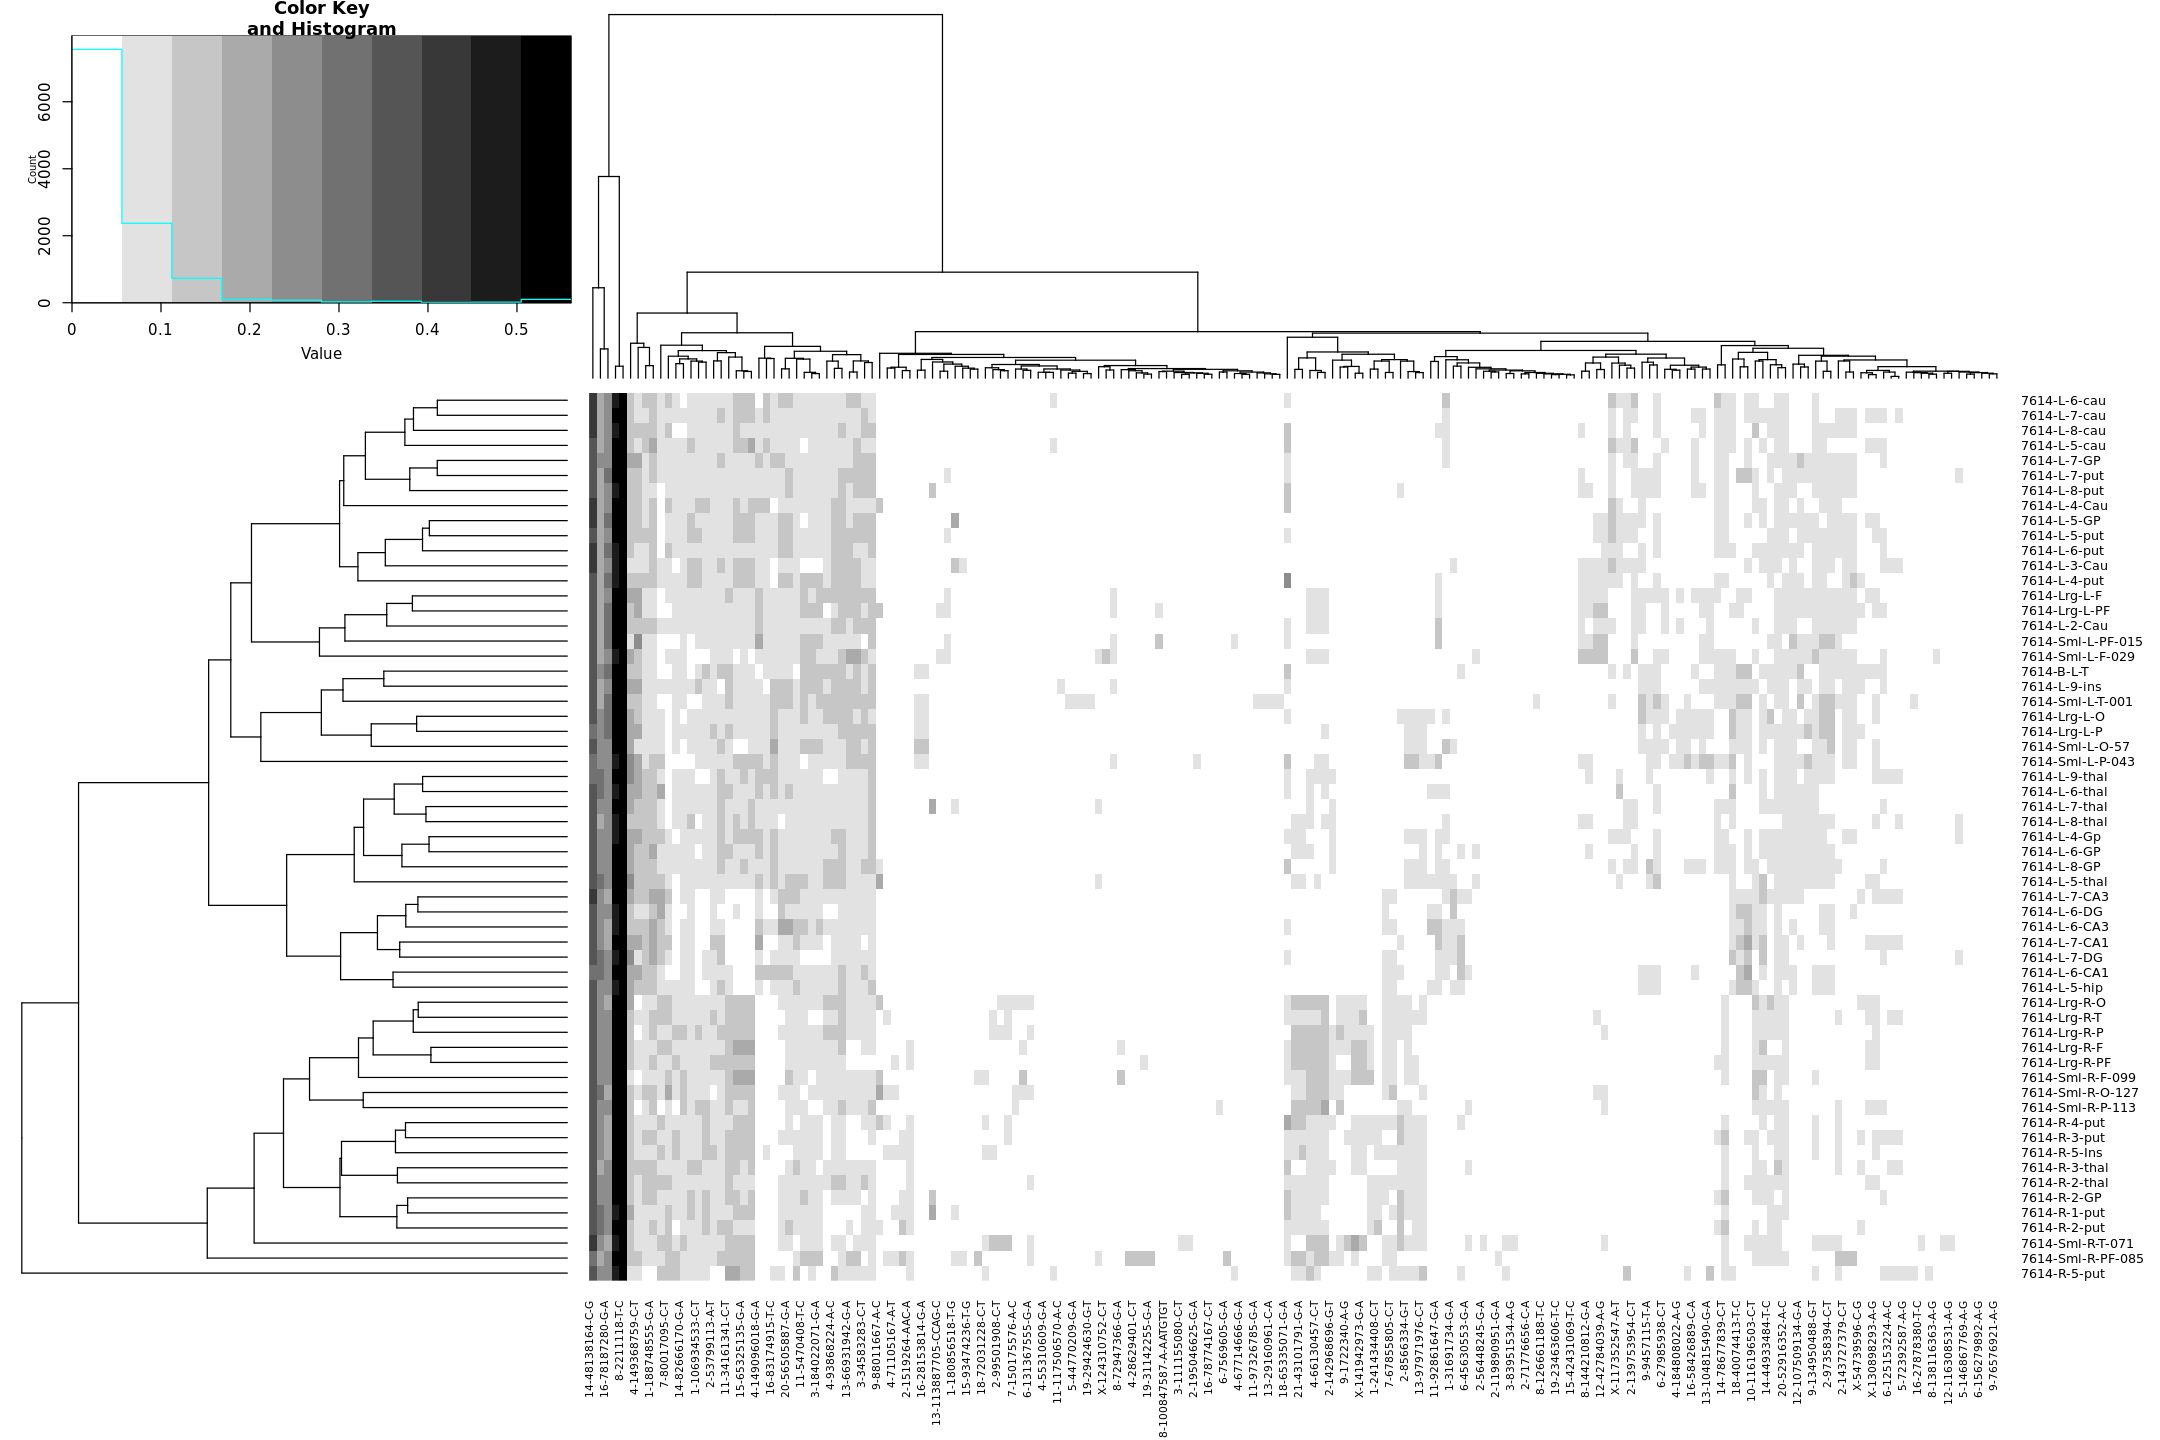

In [24]:
options(repr.plot.width=18, repr.plot.height=12)
# Colors = c("blue4","white","red4")
 Colors = c("white","black")

Colors=colorRampPalette(Colors)(10)
    heatmap.2(Normalized_casted_MAF_VarBySample2,distfun = function(x) dist(x,method = 'manhattan'),trace="none",col=Colors,margins=c(8,8),scale = c("none"))

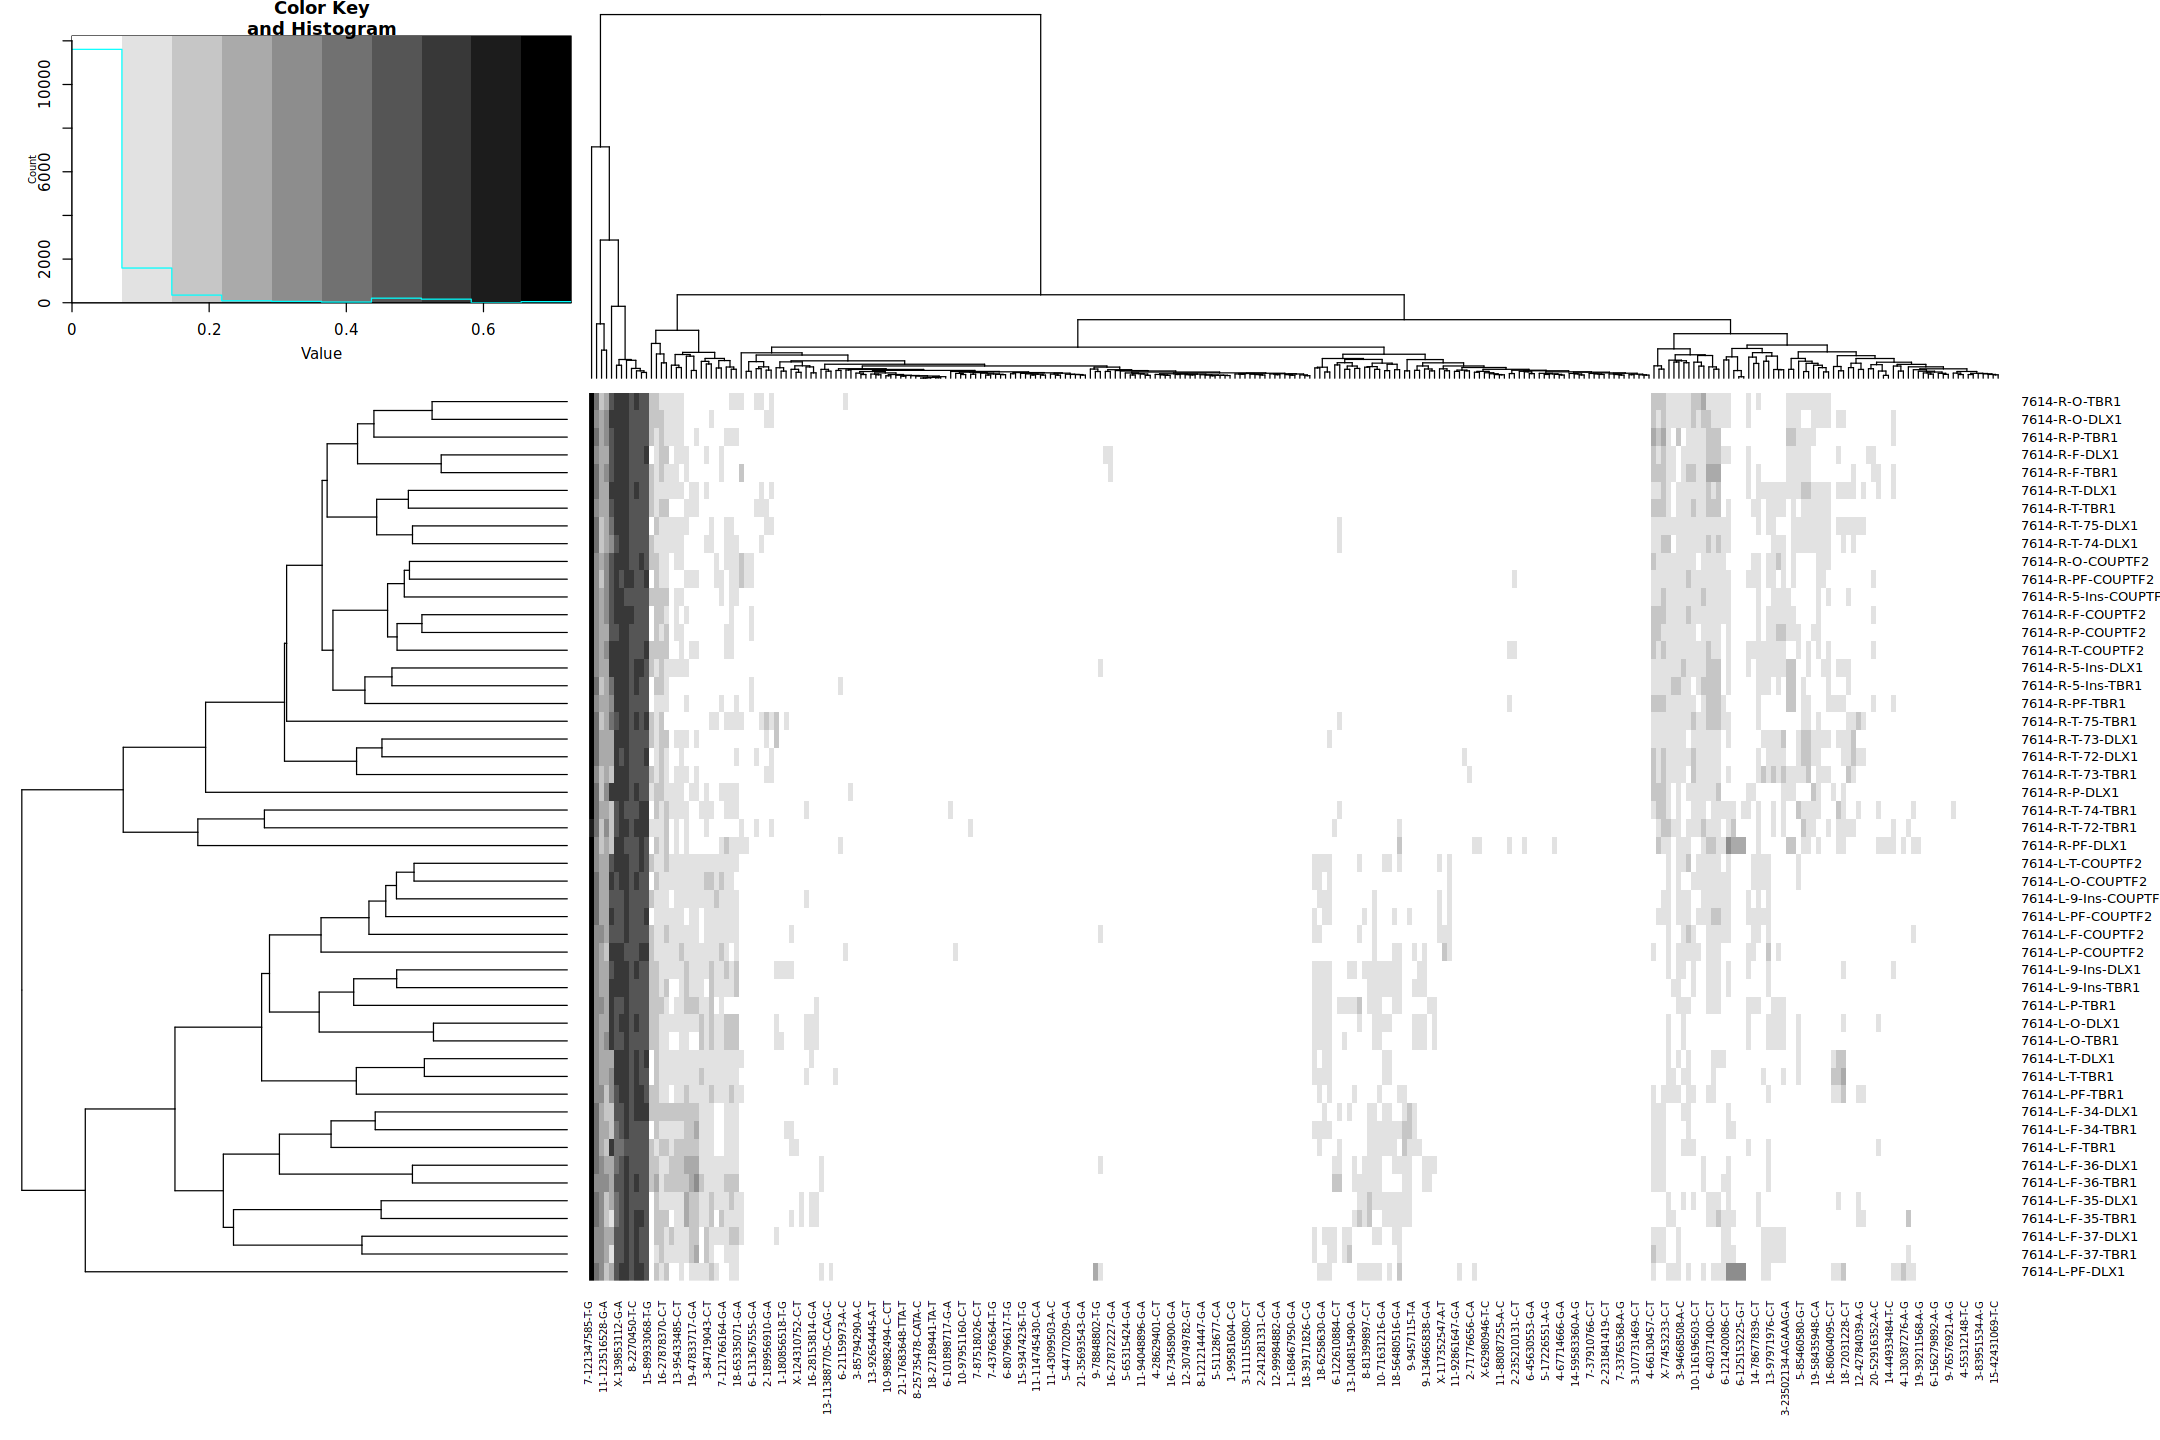

In [94]:
options(repr.plot.width=18, repr.plot.height=12)
# Colors = c("blue4","white","red4")
 Colors = c("white","black")

Colors=colorRampPalette(Colors)(10)
    heatmap.2(Normalized_casted_MAF_VarBySample2,distfun = function(x) dist(x,method = 'manhattan'),trace="none",col=Colors,margins=c(8,8),scale = c("none"))

In [88]:
casted_MAF_VarBySample_cor <- cor(t(casted_MAF_VarBySample2[,-1:-4]) ,method = "spearman")
casted_MAF_VarBySample2$Hemisphere_col[casted_MAF_VarBySample2$Hemisphere == "L"] <- "red"
casted_MAF_VarBySample2$Hemisphere_col[casted_MAF_VarBySample2$Hemisphere == "R"] <- "blue"

# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CTX"] <- my_palette[1]
# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CB"] <- my_palette[2]
# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "BG"] <- my_palette[3]
# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "AMG"] <- my_palette[4]
# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "HIP"] <- my_palette[5]
# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "THAL"] <- my_palette[6]
# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "SUB"] <- my_palette[7]
# casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CLO"] <- my_palette[8]

# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "Bulk"] <- '#F0A0FF'
 casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "COUPTF2"] <- '#0075DC'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DARPP32M-NeuNP"] <- '#993F00'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DARPP32P-NeuNP"] <- '#4C005C'
 casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DLX1"] <- '#FF5005'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "LHX2"] <- '#FFE100'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "NeuN"] <- '#2BCE48'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "Olig2"] <- '#00998F'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "PU1"] <- '#808080'
 casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "TBR1"] <- '#426600'

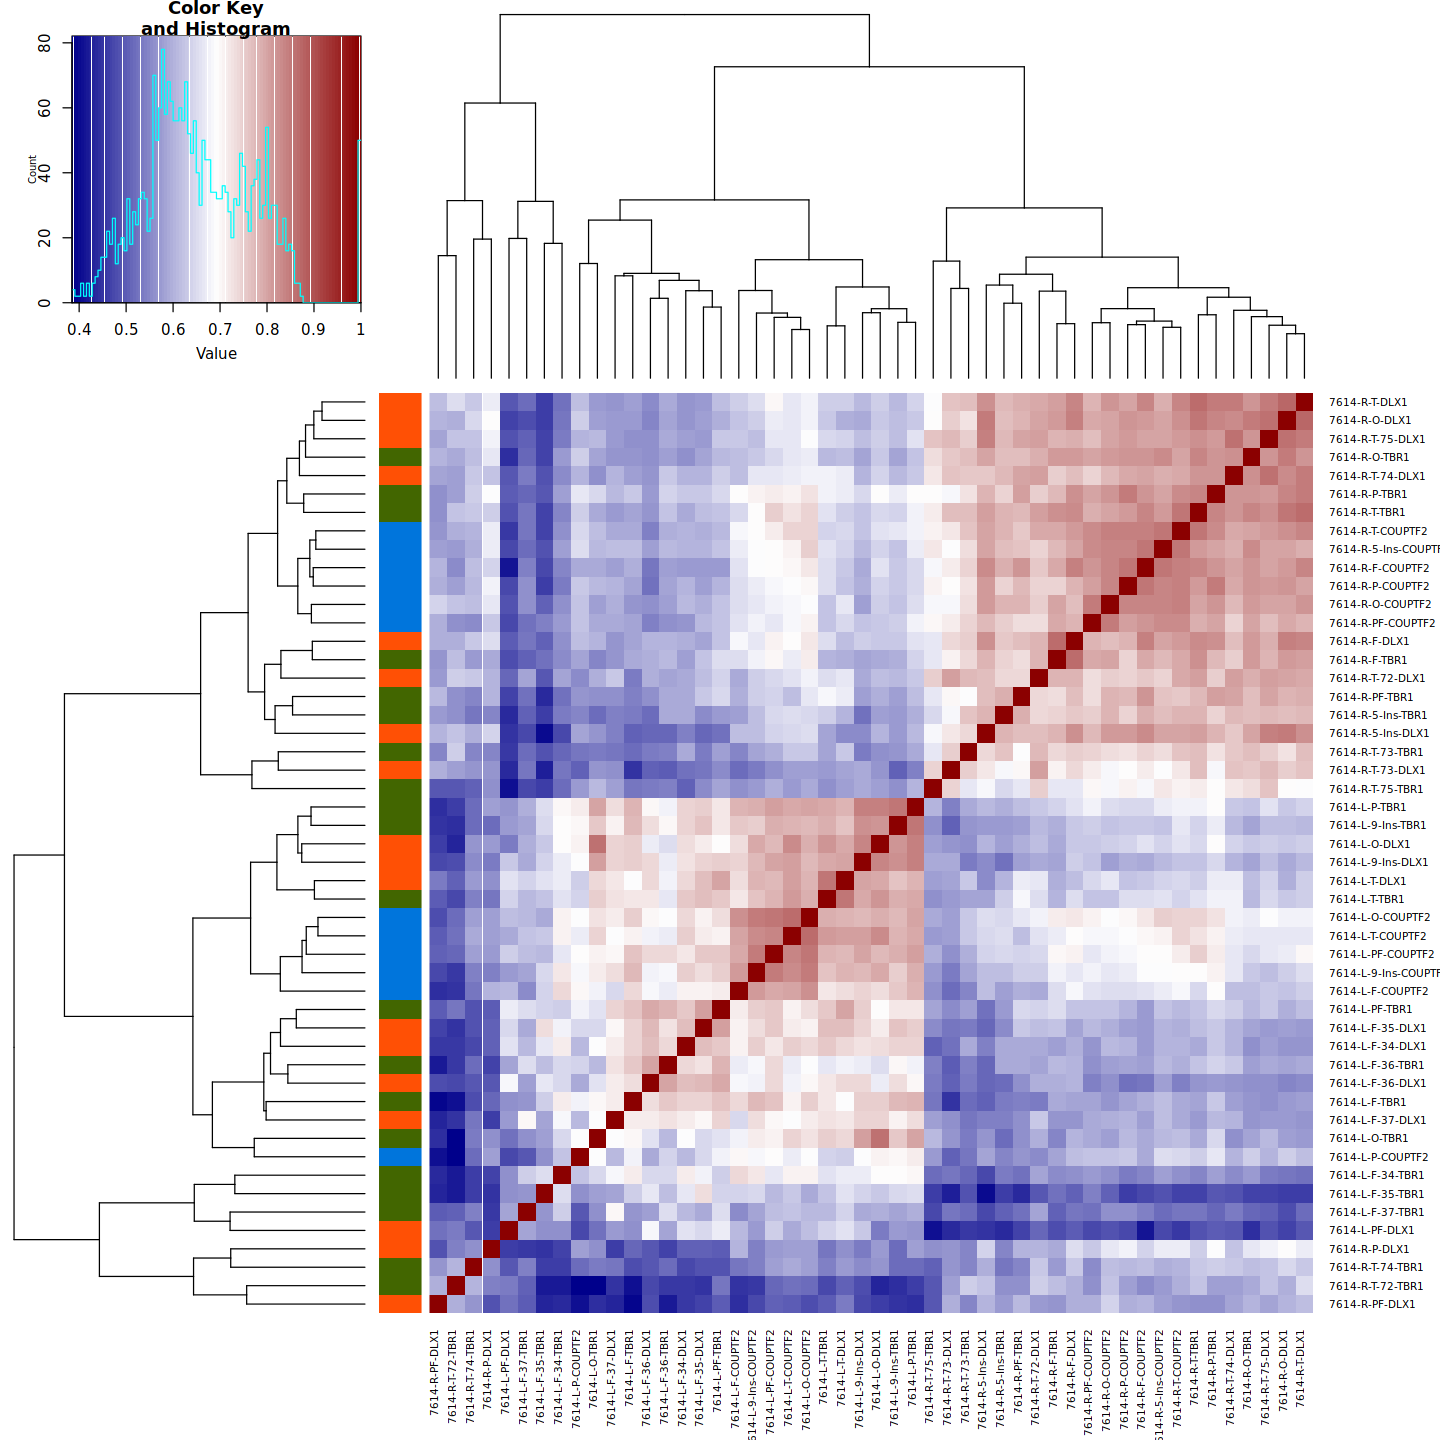

In [93]:
options(repr.plot.width=12, repr.plot.height=12)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,distfun = function(x) dist(x,method = 'euclidean'),margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Cell_Type_col)

In [37]:
pdf(file="7614_heatmap_spearman_CTX_ExN_InN_PU1.pdf",height=50,width=50)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col="bluered",margins=c(10,10))
dev.off()

png 
  2

# Sample correlation heatmap bulk

In [91]:
filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use 269 variants. assign this to mosaic_filtered
variant_list<-unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list )
variant_list$sample_number_presented <- NA

for (i in 1:nrow(variant_list)){
    filtered2 <- filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]
    n_row <- nrow(filtered2[filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$LOWER_CI>0.001677998 & 
          filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$UPPER_CI<0.3923302,])
    variant_list$sample_number_presented[i] <- n_row
    }

In [92]:
melt_mtcars<-mosaic_filtered[,c("ID", "CHROM.POS.REF.ALT", "MAF", "Hemisphere", "Organ", "Region",  "Cell_Type")]
melt_mtcars<-na.omit(melt_mtcars)
#melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]

#melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG')),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P','T','O','Ins','PF','F'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)


In [93]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Cell_Type+Organ~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)

rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]

nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

casted_MAF_VarBySample_cor <- cor(t(casted_MAF_VarBySample2[,-1:-4]) ,method = "spearman")

[1] 65

[1] "L" "R"

[1] "CTX"  "CB"   "BG"   "AMG"  "HIP"  "THAL" "SUB"  "CLO"

[1] "T"    "Cb"   "Cau"  "Amg"  "GP"   "Put"  "Hip"  "Thal" "CA1"  "CA3" 
[11] "DG"   "Sub"  "Ins"  "F"    "O"    "P"    "PF"   "Clo"

[1] "Bulk"

In [94]:
#df0<-casted_MAF_VarBySample_cor[!(rownames(casted_MAF_VarBySample_cor) %in% c("8-25735478-CATA-C")),]

In [95]:
#df1<-df0[,!(rownames(casted_MAF_VarBySample_cor) %in% c("8-25735478-CATA-C"))]

In [96]:
my_palette <- brewer.pal(n=8,"Set2")

In [97]:
my_palette

[1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494"
[8] "#B3B3B3"

In [98]:
casted_MAF_VarBySample2$Hemisphere_col[casted_MAF_VarBySample2$Hemisphere == "L"] <- "red"
casted_MAF_VarBySample2$Hemisphere_col[casted_MAF_VarBySample2$Hemisphere == "R"] <- "blue"

casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CTX"] <- my_palette[1]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CB"] <- my_palette[2]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "BG"] <- my_palette[3]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "AMG"] <- my_palette[4]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "HIP"] <- my_palette[5]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "THAL"] <- my_palette[6]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "SUB"] <- my_palette[7]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CLO"] <- my_palette[8]

# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "Bulk"] <- '#F0A0FF'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "COUPTF2"] <- '#0075DC'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DARPP32M-NeuNP"] <- '#993F00'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DARPP32P-NeuNP"] <- '#4C005C'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DLX1"] <- '#FF5005'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "LHX2"] <- '#FFE100'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "NeuN"] <- '#2BCE48'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "Olig2"] <- '#00998F'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "PU1"] <- '#808080'
# casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "TBR1"] <- '#426600'

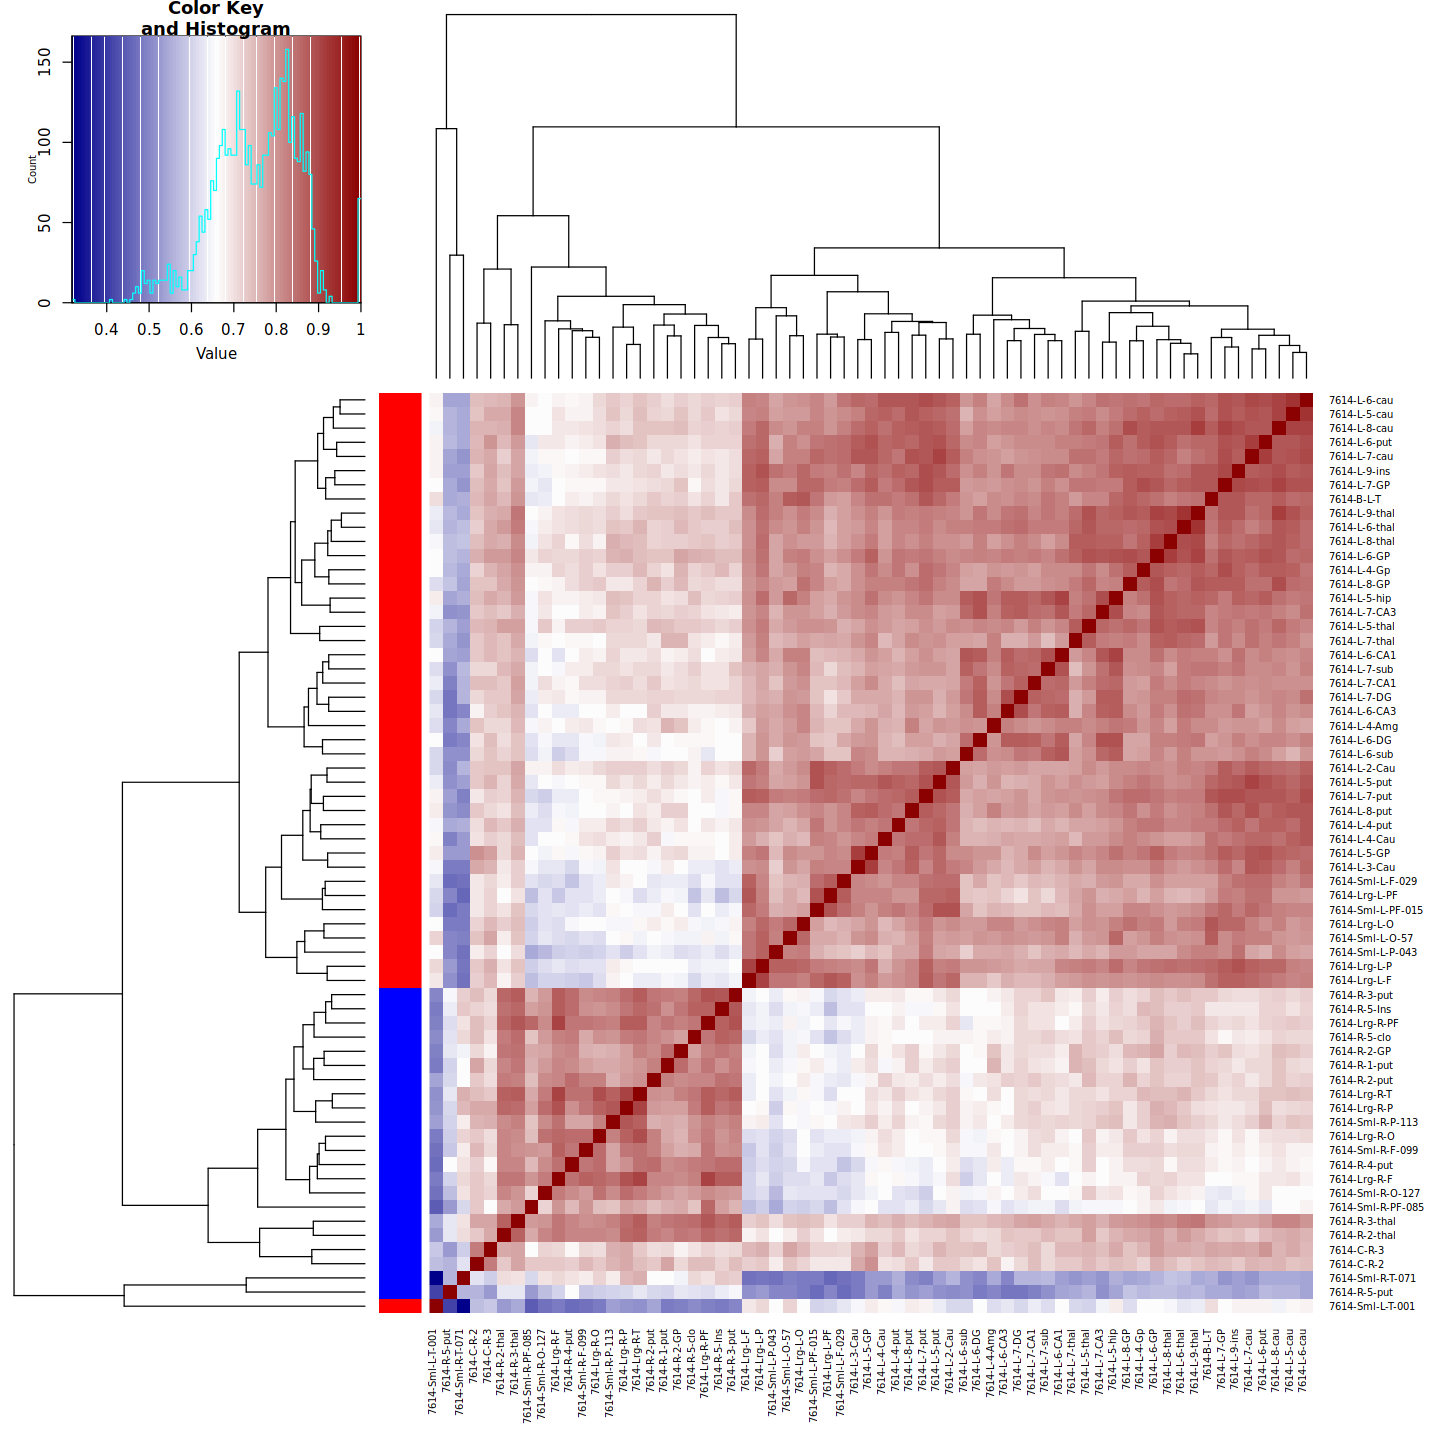

In [99]:
options(repr.plot.width=12, repr.plot.height=12)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Hemisphere_col)

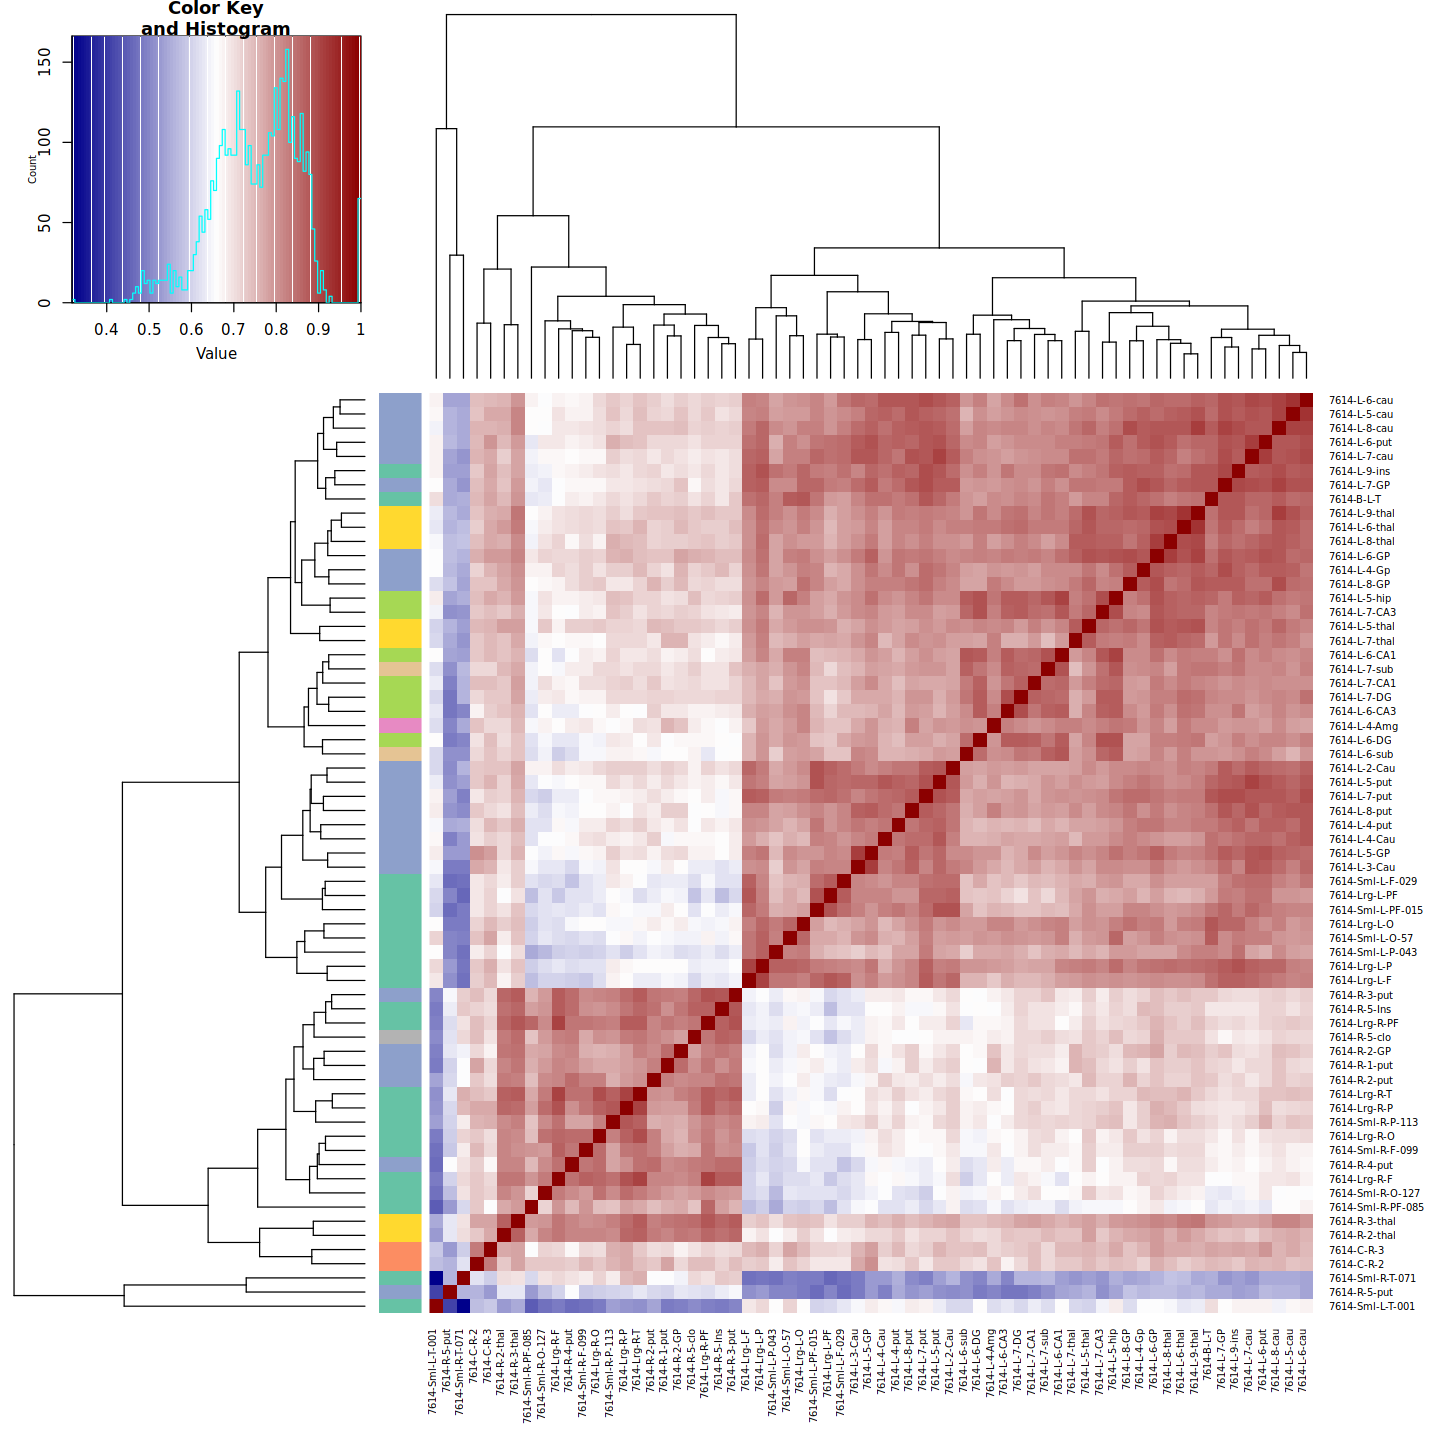

In [100]:
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Organ_col)

In [101]:
pdf(file="7614_heatmap_spearman_hemisphere_col_bulk.pdf",height=30,width=30)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Hemisphere_col)
dev.off()

pdf(file="7614_heatmap_spearman_Organ_col_bulk.pdf",height=30,width=30)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Organ_col)
dev.off()

png 
  2

png 
  2

# Sample correlation sorted

In [2]:
filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use 269 variants. assign this to mosaic_filtered
variant_list<-unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list )
variant_list$sample_number_presented <- NA

for (i in 1:nrow(variant_list)){
    filtered2 <- filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]
    n_row <- nrow(filtered2[filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$LOWER_CI>0.001677998 & 
          filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$UPPER_CI<0.3923302,])
    variant_list$sample_number_presented[i] <- n_row
    }

In [83]:
melt_mtcars<-mosaic_filtered[,c("ID", "CHROM.POS.REF.ALT", "MAF", "Hemisphere", "Organ", "Region",  "Cell_Type")]
melt_mtcars<-na.omit(melt_mtcars)
#melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])
melt_mtcars<-melt_mtcars[!melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]

#melt_mtcars<-melt_mtcars[(melt_mtcars$Organ %in% c('CTX','BG')),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P','T','O','Ins','PF','F'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [84]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Hemisphere+Region+Cell_Type+Organ~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)

rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]

nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Hemisphere)
unique(casted_MAF_VarBySample2$Organ)
unique(casted_MAF_VarBySample2$Region)
unique(casted_MAF_VarBySample2$Cell_Type)

casted_MAF_VarBySample_cor <- cor(t(casted_MAF_VarBySample2[,-1:-4]) ,method = "spearman")

[1] 142

[1] "L" "R"

[1] "BG"   "AMG"  "THAL" "HIP"  "CTX"

[1] "Cau"  "Amg"  "GP"   "Put"  "Thal" "CA1"  "CA3"  "DG"   "Ins"  "F"   
[11] "O"    "P"    "PF"   "T"

[1] "COUPTF2"        "DLX1"           "DARPP32M-NeuNP" "DARPP32P-NeuNP"
[5] "TBR1"           "NeuN"           "LHX2"           "Olig2"         
[9] "PU1"

In [85]:
my_palette <- brewer.pal(n=8,"Set2")

In [86]:
casted_MAF_VarBySample2$Hemisphere_col[casted_MAF_VarBySample2$Hemisphere == "L"] <- "red"
casted_MAF_VarBySample2$Hemisphere_col[casted_MAF_VarBySample2$Hemisphere == "R"] <- "blue"

casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CTX"] <- my_palette[1]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CB"] <- my_palette[2]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "BG"] <- my_palette[3]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "AMG"] <- my_palette[4]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "HIP"] <- my_palette[5]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "THAL"] <- my_palette[6]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "SUB"] <- my_palette[7]
casted_MAF_VarBySample2$Organ_col[casted_MAF_VarBySample2$Organ == "CLO"] <- my_palette[8]

casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "Bulk"] <- '#F0A0FF'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "COUPTF2"] <- '#0075DC'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DARPP32M-NeuNP"] <- '#993F00'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DARPP32P-NeuNP"] <- '#4C005C'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "DLX1"] <- '#FF5005'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "LHX2"] <- '#FFE100'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "NeuN"] <- '#2BCE48'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "Olig2"] <- '#00998F'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "PU1"] <- '#808080'
casted_MAF_VarBySample2$Cell_Type_col[casted_MAF_VarBySample2$Cell_Type == "TBR1"] <- '#426600'

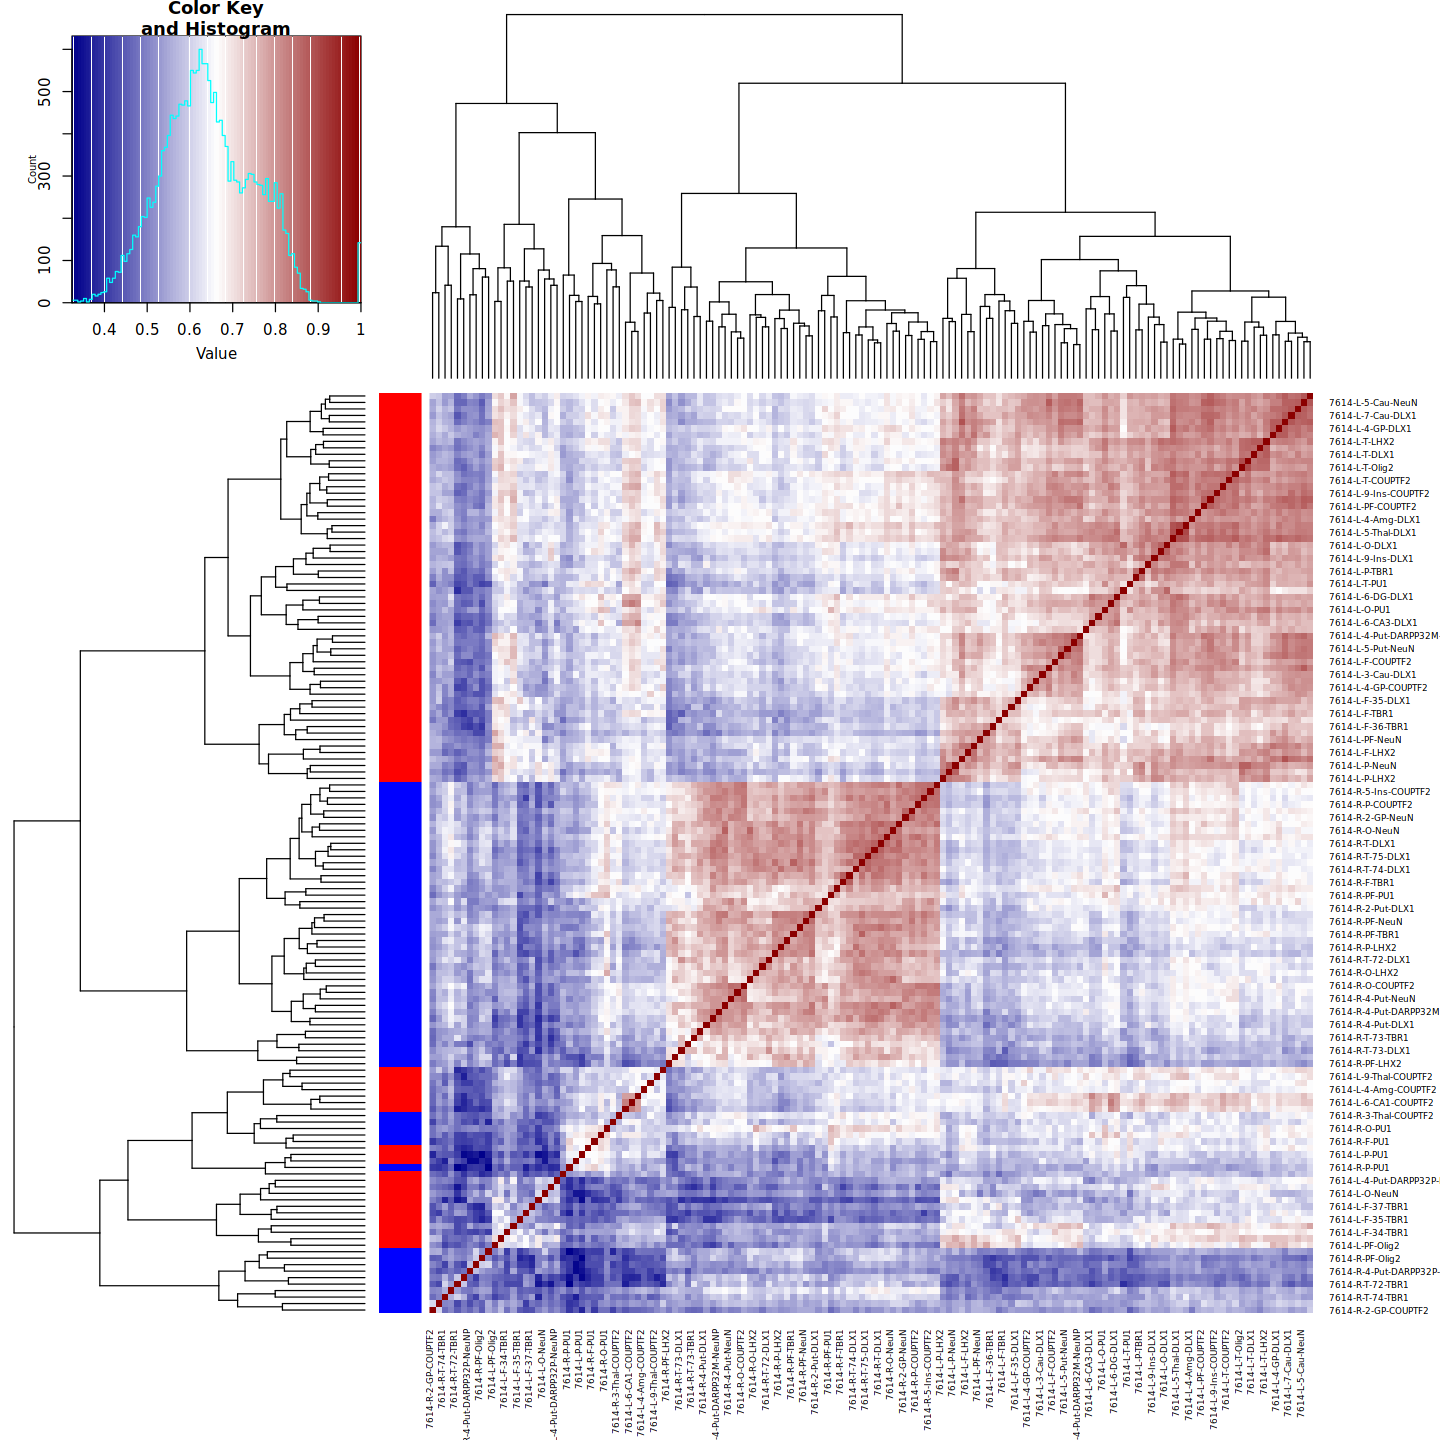

In [87]:
options(repr.plot.width=12, repr.plot.height=12)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Hemisphere_col)

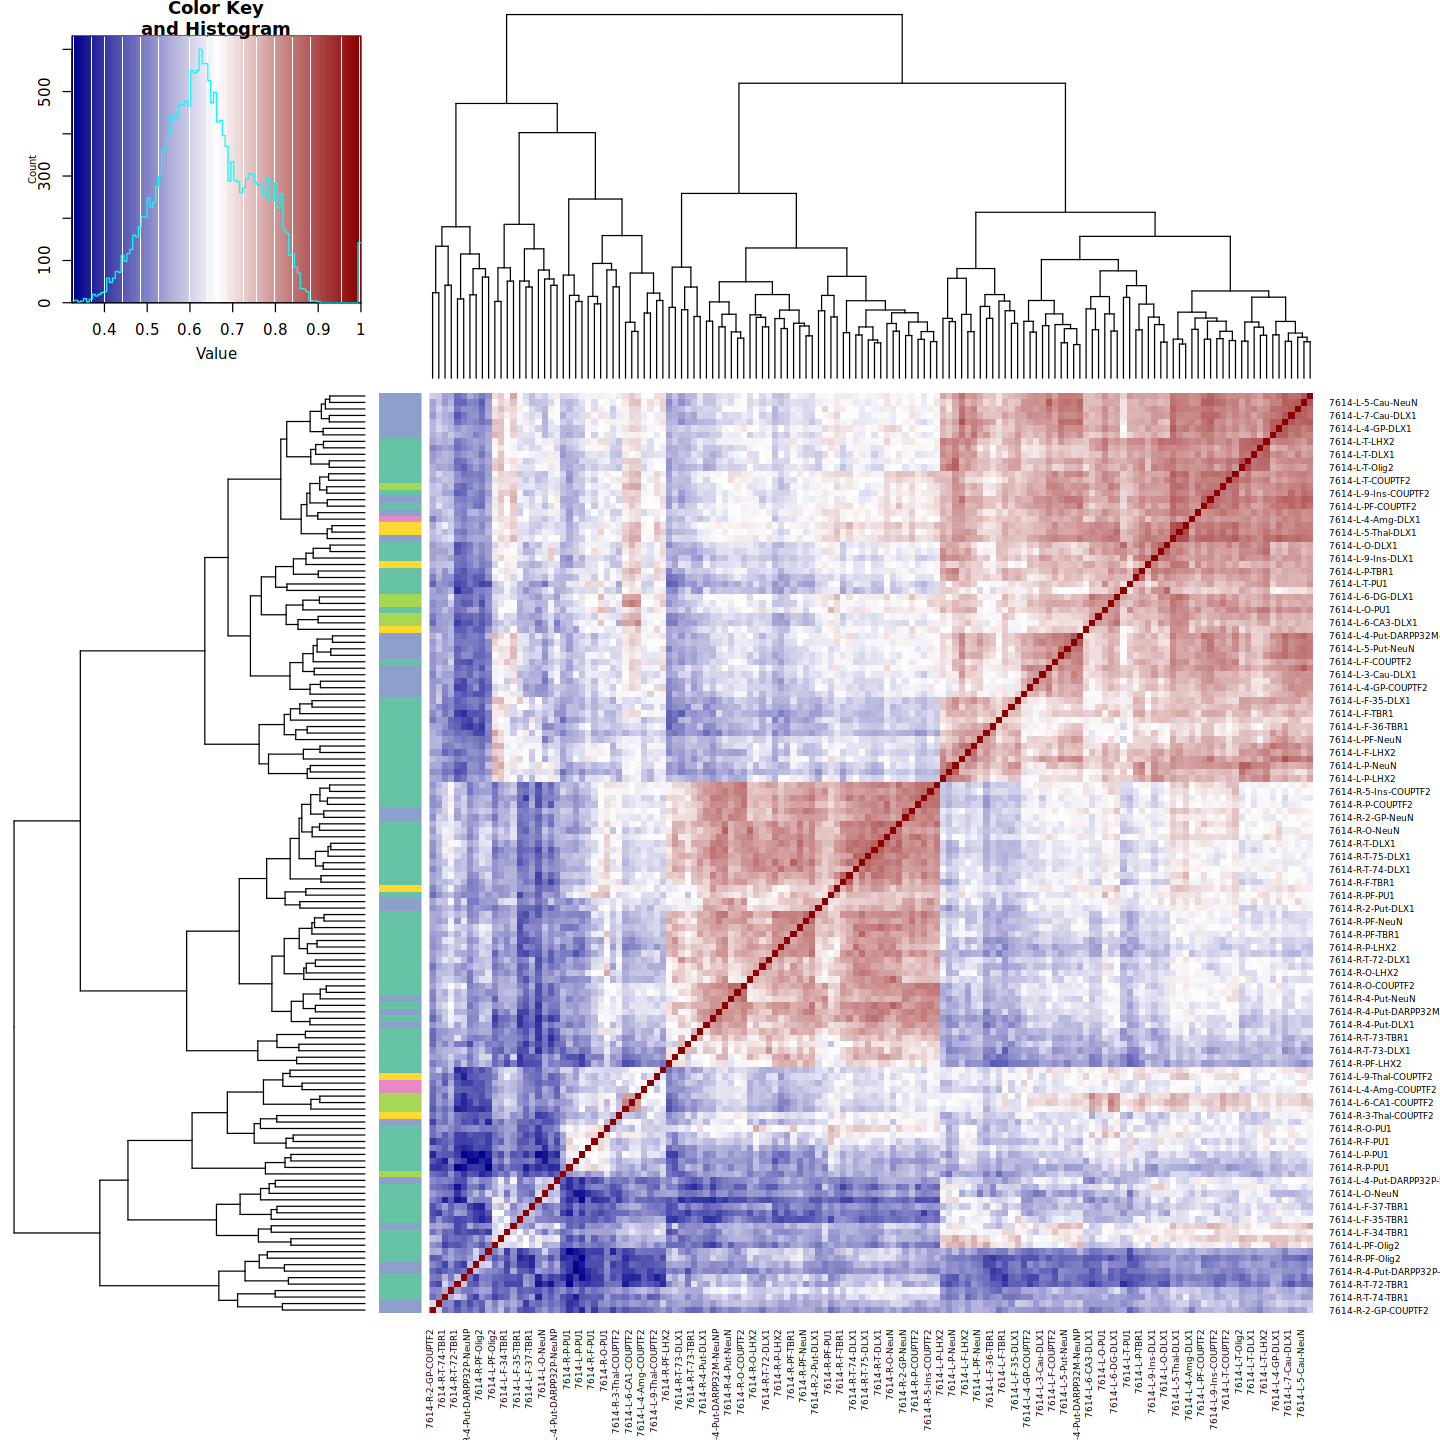

In [88]:
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Organ_col)

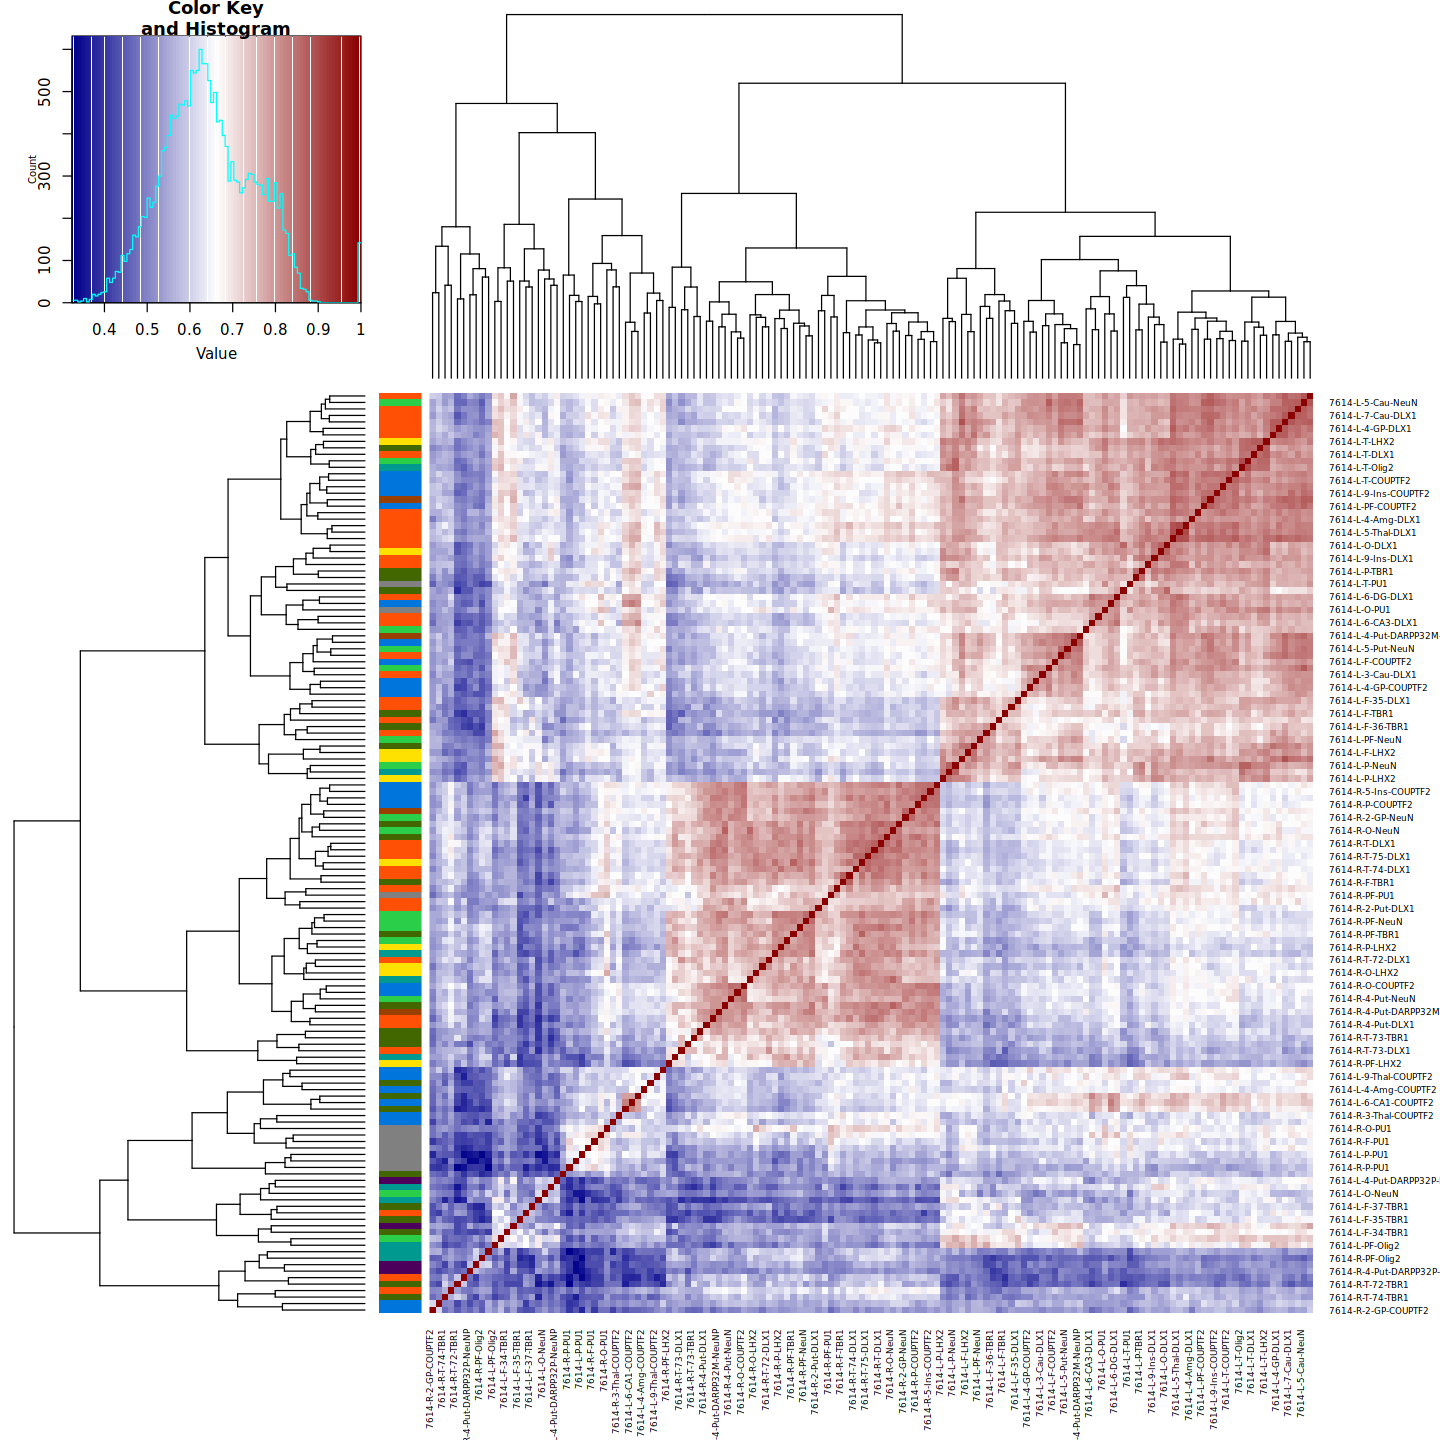

In [89]:
options(repr.plot.width=12, repr.plot.height=12)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Cell_Type_col)

In [90]:
pdf(file="7614_heatmap_spearman_hemisphere_col_sorted.pdf",height=30,width=30)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Hemisphere_col)
dev.off()

pdf(file="7614_heatmap_spearman_Organ_col_sorted.pdf",height=30,width=30)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Organ_col)
dev.off()

pdf(file="7614_heatmap_spearman_Cell_Type_col_sorted.pdf",height=30,width=30)
options(repr.plot.width=12, repr.plot.height=12)
Colors = c("blue4","white","red4")
Colors=colorRampPalette(Colors)(100)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col=Colors,margins=c(8,8),RowSideColors=casted_MAF_VarBySample2$Cell_Type_col)
dev.off()

png 
  2

png 
  2

png 
  2

In [22]:
names(casted_MAF_VarBySample2)

[1] "7614-L-2-Cau-COUPTF2" "7614-L-2-Cau-DLX1"    "7614-L-3-Cau-COUPTF2"
 [4] "7614-L-3-Cau-DLX1"    "7614-L-4-GP-COUPTF2"  "7614-L-4-GP-DLX1"    
 [7] "7614-L-4-Put-COUPTF2" "7614-L-4-Put-DLX1"    "7614-L-5-Cau-DLX1"   
[10] "7614-L-5-Put-DLX1"    "7614-L-6-GP-DLX1"     "7614-L-7-Cau-DLX1"   
[13] "7614-L-7-Put-DLX1"    "7614-L-8-GP-DLX1"     "7614-L-9-Ins-COUPTF2"
[16] "7614-L-9-Ins-DLX1"    "7614-L-9-Ins-TBR1"    "7614-L-F-34-DLX1"    
[19] "7614-L-F-34-TBR1"     "7614-L-F-35-DLX1"     "7614-L-F-35-TBR1"    
[22] "7614-L-F-36-DLX1"     "7614-L-F-36-TBR1"     "7614-L-F-37-DLX1"    
[25] "7614-L-F-37-TBR1"     "7614-L-F-COUPTF2"     "7614-L-F-TBR1"       
[28] "7614-L-O-COUPTF2"     "7614-L-O-DLX1"        "7614-L-O-TBR1"       
[31] "7614-L-P-COUPTF2"     "7614-L-P-TBR1"        "7614-L-PF-COUPTF2"   
[34] "7614-L-PF-DLX1"       "7614-L-PF-TBR1"       "7614-L-T-COUPTF2"    
[37] "7614-L-T-DLX1"        "7614-L-T-TBR1"        "7614-R-2-GP-COUPTF2" 
[40] "7614-R-2-GP-DLX1"     "7614-R-2-Put-COUPTF2" "7614-R-2-Put-DLX1"   
[43] "7614-R-4-Put-COUPTF2" "7614-R-4-Put-DLX1"    "7614-R-5-Ins-COUPTF2"
[46] "7614-R-5-Ins-DLX1"    "7614-R-5-Ins-TBR1"    "7614-R-F-COUPTF2"    
[49] "7614-R-F-DLX1"        "7614-R-F-TBR1"        "7614-R-O-COUPTF2"    
[52] "7614-R-O-DLX1"        "7614-R-O-TBR1"        "7614-R-P-COUPTF2"    
[55] "7614-R-P-DLX1"        "7614-R-P-TBR1"        "7614-R-PF-COUPTF2"   
[58] "7614-R-PF-DLX1"       "7614-R-PF-TBR1"       "7614-R-T-72-DLX1"    
[61] "7614-R-T-72-TBR1"     "7614-R-T-73-DLX1"     "7614-R-T-73-TBR1"    
[64] "7614-R-T-74-DLX1"     "7614-R-T-74-TBR1"     "7614-R-T-75-DLX1"    
[67] "7614-R-T-75-TBR1"     "7614-R-T-COUPTF2"     "7614-R-T-DLX1"       
[70] "7614-R-T-TBR1"

In [23]:
casted_MAF_VarBySample2

7614-L-2-Cau-COUPTF2 7614-L-2-Cau-DLX1 7614-L-3-Cau-COUPTF2
1-106934533-C-T     0.168643515          0.103389333       0.134417643         
1-168467950-G-A     0.019168253          0.013876180       0.016402702         
1-169329191-G-A     0.074397953          0.056665472       0.109990493         
1-180856518-T-G     0.000000000          0.000000000       0.011656310         
1-188748555-G-A     0.076380602          0.114254783       0.038124643         
1-212352377-G-T     0.000000000          0.008272377       0.013237778         
1-221888654-T-C     0.132022407          0.099347109       0.122017125         
1-239397797-T-A     0.000000000          0.000000000       0.009247770         
1-240507547-A-T     0.000000000          0.017275650       0.010831878         
1-45675887-A-C      0.009253311          0.007876947       0.012041640         
1-98426749-G-A      0.000000000          0.016199422       0.022929508         
1-99581604-C-G      0.010678253          0.010445039       0.027005337         
10-116196503-C-T    0.019797776          0.065888332       0.040043200         
10-127139902-G-A    0.504028666          0.494250944       0.498690507         
10-133022785-C-T    0.088951035          0.081283663       0.060717674         
10-134908190-G-A    0.019059724          0.038949097       0.009184367         
10-23042694-GAGTT-G 0.000000000          0.024932888       0.000000000         
10-71631216-G-A     0.021133574          0.050653206       0.021767725         
10-84641815-C-T     0.015410168          0.014099899       0.011530107         
10-97951160-C-T     0.012084647          0.011240568       0.018494433         
10-98982494-C-CT    0.000000000          0.000000000       0.000000000         
11-110591774-A-C    0.000000000          0.014583397       0.016087930         
11-114745430-C-A    0.010395819          0.020569427       0.018689140         
11-115043033-C-T    0.000000000          0.020419506       0.040320250         
11-117506570-A-C    0.017482090          0.020550597       0.000000000         
11-123516528-G-A    0.152412378          0.202410226       0.217427959         
11-129560658-C-T    0.020629156          0.025042295       0.017391304         
11-34161341-C-T     0.156053190          0.079131162       0.115624323         
11-43099503-A-C     0.000000000          0.012407292       0.009882118         
11-5470408-T-C      0.094859908          0.110869422       0.080824437         
⋮                   ⋮                    ⋮                 ⋮                   
8-2199684-G-A       0.471605736          0.49097482        0.506904815         
8-2211118-T-C       0.528778802          0.51895079        0.517954916         
8-2270450-T-C       0.540784738          0.50495763        0.505586094         
8-25735478-CATA-C   0.000000000          0.00000000        0.000000000         
8-27531157-G-A      0.035677898          0.02254976        0.034760800         
8-28894088-T-G      0.008675341          0.02084626        0.044645362         
8-63618020-A-C      0.011430251          0.01663320        0.000000000         
8-72947366-G-A      0.011729449          0.02201061        0.020860513         
8-73826564-G-A      0.015876016          0.00000000        0.012070993         
8-81399897-C-T      0.060535647          0.07569372        0.047645064         
9-133760767-C-T     0.026023451          0.02439659        0.027122540         
9-134665838-G-A     0.013009523          0.02063809        0.020435844         
9-134950488-G-T     0.112099289          0.08381475        0.083371940         
9-1722340-A-G       0.039447655          0.02036791        0.037921251         
9-38668272-C-T      0.030176292          0.01118593        0.028833894         
9-76576921-A-G      0.035915268          0.04536967        0.056249711         
9-78228121-C-G      0.020971843          0.00000000        0.008744721         
9-7860755-C-T       0.008873565          0.01176389        0.018493959         
9-78848802-T-G      

In [ ]:
# '7614-L-9-Ins-COUPTF2'                                                                    '7614-L-F-COUPTF2''7614-L-O-COUPTF2'
# '7614-L-9-Ins-DLX1''7614-L-F-34-DLX1''7614-L-F-35-DLX1''7614-L-F-36-DLX1''7614-L-F-37-DLX1'               '7614-L-O-DLX1'
# '7614-L-9-Ins-TBR1''7614-L-F-34-TBR1''7614-L-F-35-TBR1''7614-L-F-36-TBR1''7614-L-F-37-TBR1''7614-L-F-TBR1''7614-L-O-TBR1'

# '7614-L-P-COUPTF2''7614-L-PF-COUPTF2''7614-L-T-COUPTF2''7614-R-5-Ins-COUPTF2''7614-R-F-COUPTF2''7614-R-O-COUPTF2''7614-R-P-COUPTF2'
#                   '7614-L-PF-DLX1''7614-L-T-DLX1''7614-R-5-Ins-DLX1'         '7614-R-F-DLX1'   '7614-R-O-DLX1'   '7614-R-P-DLX1'
# '7614-L-P-TBR1'   '7614-L-PF-TBR1''7614-L-T-TBR1''7614-R-5-Ins-TBR1'         '7614-R-F-TBR1'   '7614-R-O-TBR1'   '7614-R-P-TBR1'

# '7614-R-PF-COUPTF2''7614-R-T-COUPTF2'
# '7614-R-PF-DLX1''7614-R-T-72-DLX1''7614-R-T-73-DLX1''7614-R-T-74-DLX1''7614-R-T-75-DLX1''7614-R-T-DLX1'
# '7614-R-PF-TBR1''7614-R-T-72-TBR1''7614-R-T-73-TBR1''7614-R-T-74-TBR1''7614-R-T-75-TBR1''7614-R-T-TBR1'

In [38]:
casted_MAF_VarBySample3<-casted_MAF_VarBySample2[,c('7614-L-9-Ins-COUPTF2','7614-L-O-COUPTF2','7614-L-PF-COUPTF2','7614-L-T-COUPTF2',
                                                   '7614-R-5-Ins-COUPTF2','7614-R-F-COUPTF2','7614-R-O-COUPTF2','7614-R-P-COUPTF2','7614-R-PF-COUPTF2',
                                                   '7614-R-T-COUPTF2',
                                                   '7614-L-9-Ins-DLX1','7614-L-O-DLX1','7614-L-PF-DLX1','7614-L-T-DLX1',
                                                   '7614-R-5-Ins-DLX1','7614-R-F-DLX1','7614-R-O-DLX1','7614-R-P-DLX1','7614-R-PF-DLX1',
                                                   '7614-R-T-DLX1',
                                                   '7614-L-9-Ins-TBR1','7614-L-O-TBR1','7614-L-PF-TBR1','7614-L-T-TBR1',
                                                   '7614-R-5-Ins-TBR1','7614-R-F-TBR1','7614-R-O-TBR1','7614-R-P-TBR1','7614-R-PF-TBR1',
                                                   '7614-R-T-TBR1')]

In [24]:
casted_MAF_VarBySample3<-casted_MAF_VarBySample2[,c('7614-L-9-Ins-DLX1','7614-L-F-34-DLX1','7614-L-F-35-DLX1','7614-L-F-36-DLX1',
                                                    '7614-L-F-37-DLX1','7614-L-O-DLX1','7614-L-PF-DLX1','7614-L-T-DLX1',
                                                    '7614-R-5-Ins-DLX1','7614-R-F-DLX1','7614-R-O-DLX1','7614-R-P-DLX1',
                                                   '7614-R-PF-DLX1','7614-R-T-72-DLX1','7614-R-T-73-DLX1','7614-R-T-74-DLX1',
                                                    '7614-R-T-75-DLX1','7614-R-T-DLX1',
                                                   '7614-L-9-Ins-TBR1','7614-L-F-34-TBR1','7614-L-F-35-TBR1','7614-L-F-36-TBR1',
                                                    '7614-L-F-37-TBR1','7614-L-O-TBR1','7614-L-PF-TBR1','7614-L-T-TBR1',
                                                    '7614-R-5-Ins-TBR1','7614-R-F-TBR1','7614-R-O-TBR1','7614-R-P-TBR1',
                                                   '7614-R-PF-TBR1','7614-R-T-72-TBR1','7614-R-T-73-TBR1','7614-R-T-74-TBR1',
                                                    '7614-R-T-75-TBR1','7614-R-T-TBR1')]
casted_MAF_VarBySample4<-casted_MAF_VarBySample2[,c('7614-L-9-Ins-COUPTF2','7614-L-F-COUPTF2','7614-L-O-COUPTF2','7614-L-P-COUPTF2',
                                                   '7614-L-PF-COUPTF2','7614-L-T-COUPTF2','7614-R-5-Ins-COUPTF2','7614-R-F-COUPTF2',
                                                   '7614-R-O-COUPTF2','7614-R-P-COUPTF2','7614-R-PF-COUPTF2','7614-R-T-COUPTF2',
                                                   '7614-L-9-Ins-TBR1','7614-L-F-TBR1','7614-L-O-TBR1','7614-L-P-TBR1',
                                                   '7614-L-PF-TBR1','7614-L-T-TBR1','7614-R-5-Ins-TBR1','7614-R-F-TBR1',
                                                   '7614-R-O-TBR1','7614-R-P-TBR1','7614-R-PF-TBR1','7614-R-T-72-TBR1')]
casted_MAF_VarBySample5<-casted_MAF_VarBySample2[,c('7614-L-9-Ins-COUPTF2','7614-L-O-COUPTF2',
                                                   '7614-L-PF-COUPTF2','7614-L-T-COUPTF2','7614-R-5-Ins-COUPTF2','7614-R-F-COUPTF2',
                                                   '7614-R-O-COUPTF2','7614-R-P-COUPTF2','7614-R-PF-COUPTF2','7614-R-T-COUPTF2',
                                                    '7614-L-9-Ins-DLX1','7614-L-O-DLX1',
                                                    '7614-L-PF-DLX1','7614-L-T-DLX1','7614-R-5-Ins-DLX1','7614-R-F-DLX1',
                                                    '7614-R-O-DLX1','7614-R-P-DLX1','7614-R-PF-DLX1','7614-R-T-72-DLX1')]

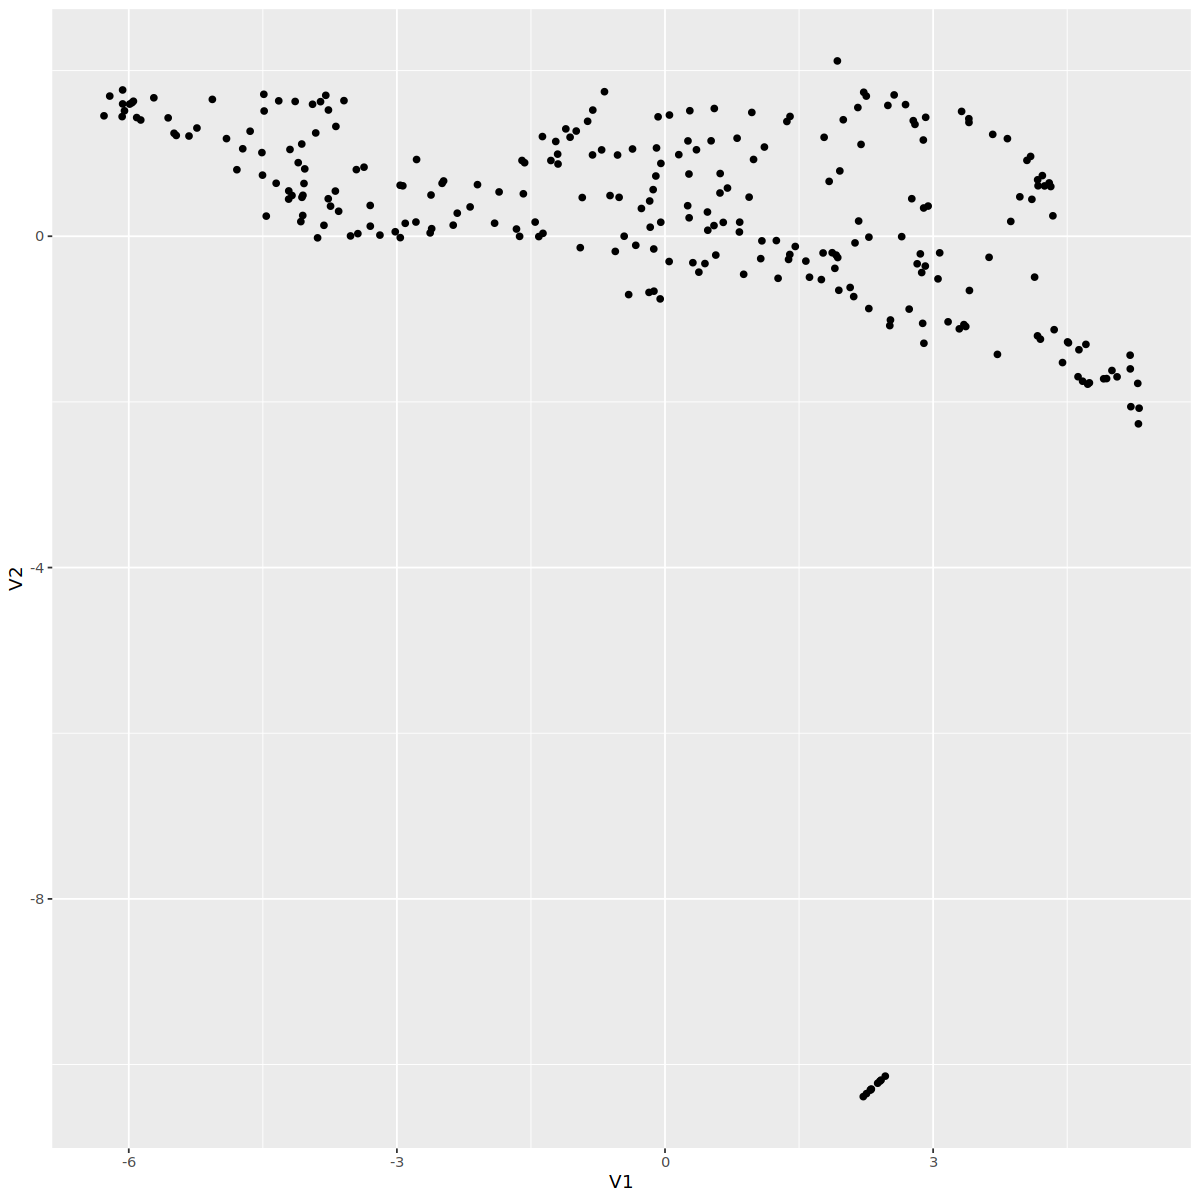

In [39]:
casted_MAF_VarBySample_umap3<-umap(casted_MAF_VarBySample3)

df<-as.data.frame(casted_MAF_VarBySample_umap3$layout)

# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
ggplot(df, aes(x=V1, y=V2)) +
  geom_point()

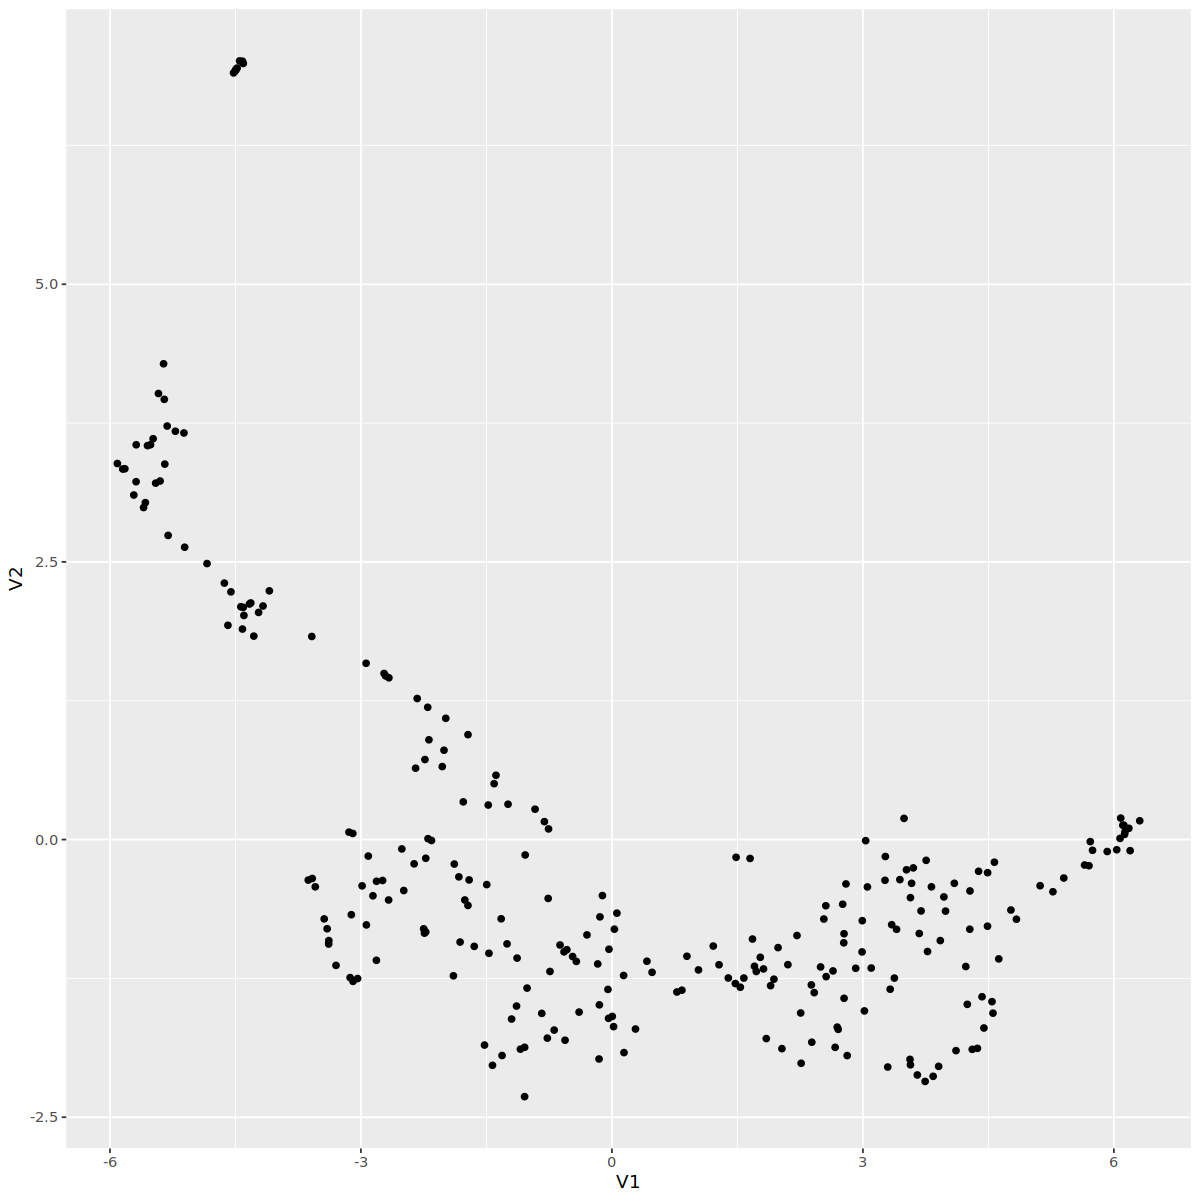

In [26]:
casted_MAF_VarBySample_umap4<-umap(casted_MAF_VarBySample4)

df<-as.data.frame(casted_MAF_VarBySample_umap4$layout)

# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
ggplot(df, aes(x=V1, y=V2)) +
  geom_point()

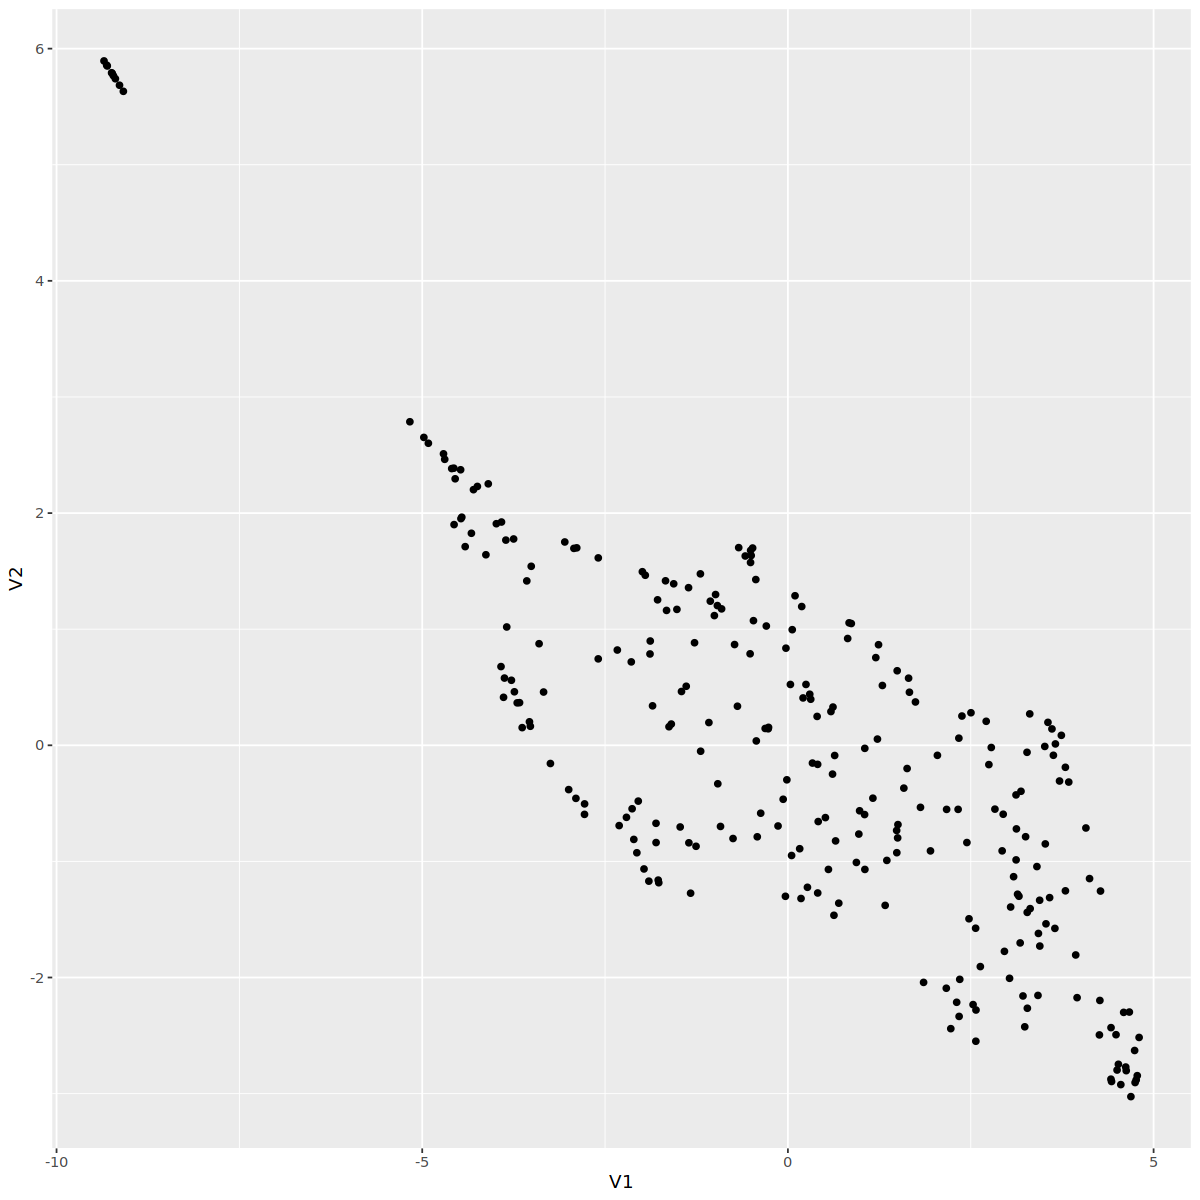

In [27]:
casted_MAF_VarBySample_umap5<-umap(casted_MAF_VarBySample5)

df<-as.data.frame(casted_MAF_VarBySample_umap5$layout)

# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
ggplot(df, aes(x=V1, y=V2)) +
  geom_point()

In [42]:
correlation <- NA
correlation<-as.data.frame(correlation)
for (i in 1:nrow(casted_MAF_VarBySample3)){
    a<-cor(t(casted_MAF_VarBySample3[i,c(1:10)]), t(casted_MAF_VarBySample3[i,c(11:20)]),method = "spearman") # COUPTF2 DLX1 cor
    correlation[i,1]<-a[1]
    a<-cor(t(casted_MAF_VarBySample3[i,c(11:20)]), t(casted_MAF_VarBySample3[i,c(21:30)]),method = "spearman") # DLX1 TBR1 cor
    correlation[i,2]<-a[1]
    a<-cor(t(casted_MAF_VarBySample3[i,c(21:30)]), t(casted_MAF_VarBySample3[i,c(1:10)]),method = "spearman") # TBR1 COUPTF2 cor
    correlation[i,3]<-a[1]
    }

correlation<-as.data.frame(correlation)
correlation$sample <-'7614'
correlation<-na.omit(correlation)

Warning message in cor(t(casted_MAF_VarBySample3[i, c(1:10)]), t(casted_MAF_VarBySample3[i, :
“the standard deviation is zero”
Warning message in cor(t(casted_MAF_VarBySample3[i, c(11:20)]), t(casted_MAF_VarBySample3[i, :
“the standard deviation is zero”
Warning message in cor(t(casted_MAF_VarBySample3[i, c(21:30)]), t(casted_MAF_VarBySample3[i, :
“the standard deviation is zero”
Warning message in cor(t(casted_MAF_VarBySample3[i, c(11:20)]), t(casted_MAF_VarBySample3[i, :
“the standard deviation is zero”
Warning message in cor(t(casted_MAF_VarBySample3[i, c(21:30)]), t(casted_MAF_VarBySample3[i, :
“the standard deviation is zero”
Warning message in cor(t(casted_MAF_VarBySample3[i, c(1:10)]), t(casted_MAF_VarBySample3[i, :
“the standard deviation is zero”
Warning message in cor(t(casted_MAF_VarBySample3[i, c(11:20)]), t(casted_MAF_VarBySample3[i, :
“the standard deviation is zero”
Warning message in cor(t(casted_MAF_VarBySample3[i, c(21:30)]), t(casted_MAF_VarBySample3[i, :
“the standa

In [44]:
head(correlation)

correlation  V2         V3          sample
1 -0.006060606  0.8303030  0.16363636 7614  
2  0.018181818  0.2969697  0.17575758 7614  
3  0.769696970  0.5878788  0.24848485 7614  
4  0.144827586  0.3103448 -0.31034483 7614  
5  0.078787879  0.5878788 -0.11515152 7614  
6  0.267080745 -0.3323219 -0.05538698 7614

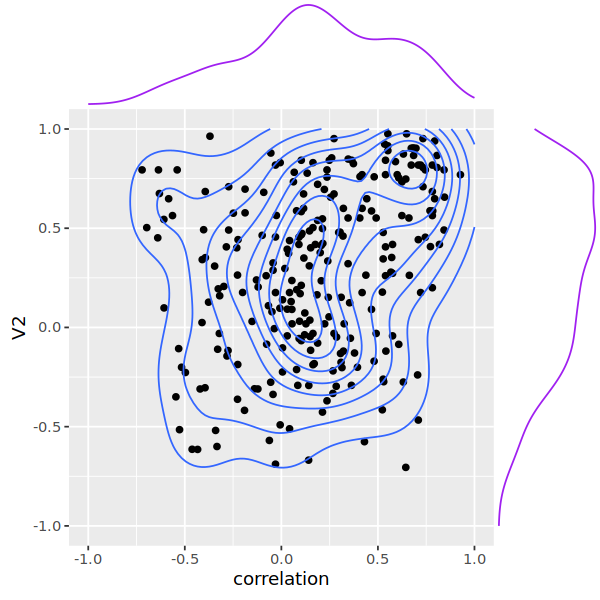

In [62]:
options(repr.plot.width=5,repr.plot.height=5)
p<-ggplot(correlation, aes(x=correlation, y=V2)) + geom_point()+xlim(-1,1)+ylim(-1,1)+geom_density_2d() # dlx1-couptf2 vs dlx-tbr1
ggMarginal(p, color="purple", size=4)

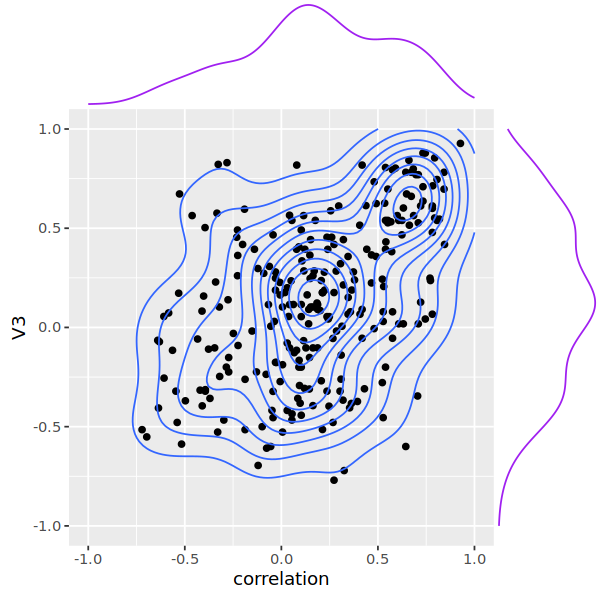

In [63]:
p<-ggplot(correlation, aes(x=correlation, y=V3)) + geom_point()+xlim(-1,1)+ylim(-1,1)+geom_density_2d() # couptf2-dlx1 vs couptf2-tbr1
ggMarginal(p, color="purple", size=4)

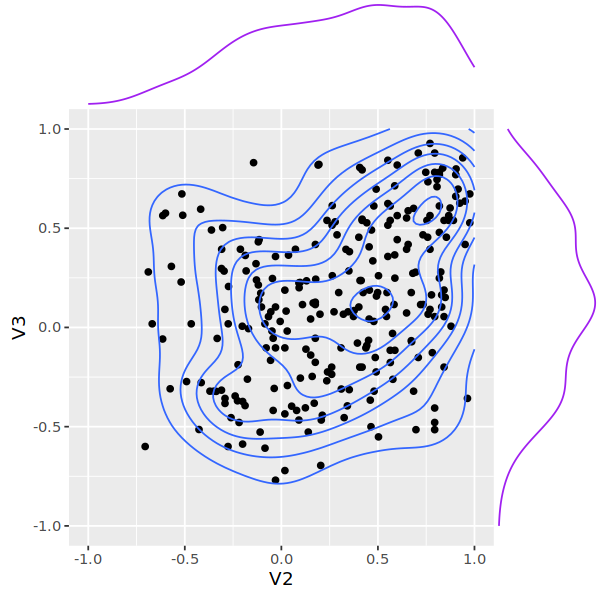

In [64]:
p<-ggplot(correlation, aes(x=V2, y=V3)) + geom_point()+xlim(-1,1)+ylim(-1,1)+geom_density_2d() # tbr1-dlx1 vs tbr1-couptf2
ggMarginal(p, color="purple", size=4)

# Dorsal vs ventral

In [2]:
filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")
variant_anno <- read.table("../variant_annotation/287_variant_annotation.csv",header=T,sep=",")

In [3]:
Brain_only_variants<-variant_anno[variant_anno$Brain_only==1,]$variant_list

[1] 0.00119641

[1] 0.001677083

[1] 0.001387175

[1] 0.001461532

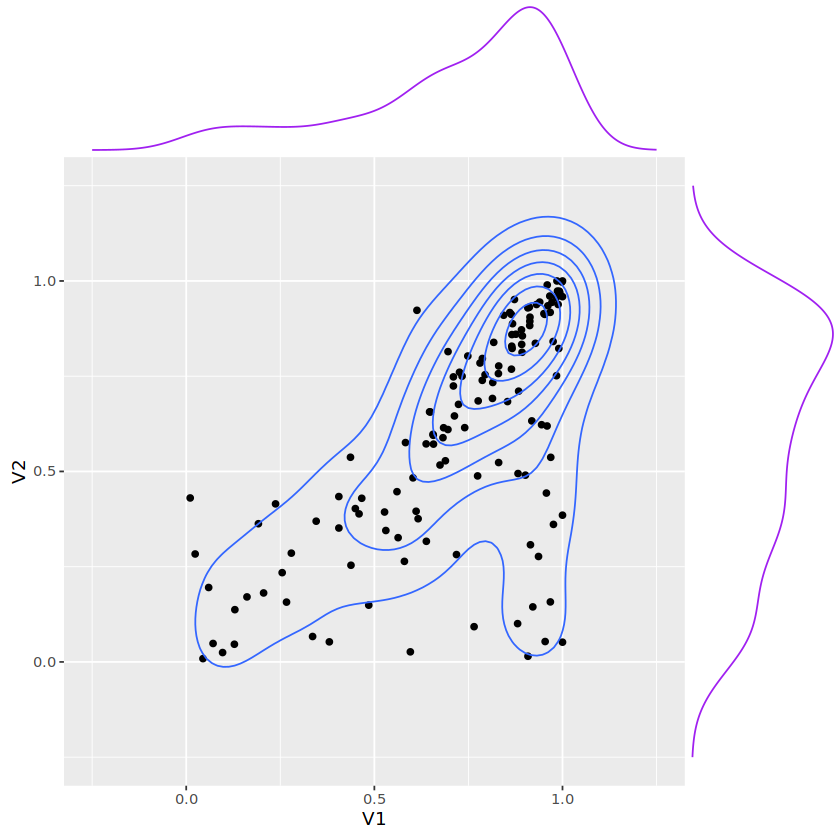

In [4]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% Brain_only_variants)

Dor <- subset(filtered_brain_only, AntPost %in% c('Ant') & Cell_Type=='Bulk' & Organ=='CTX' & Note=='SMALL')
Ven <- subset(filtered_brain_only, AntPost %in% c('Post')& Cell_Type=='Bulk' & Organ=='CTX'& Note=='SMALL')
Ant <- subset(filtered_brain_only, Hemisphere %in% c('L')& Cell_Type=='Bulk' & Organ=='CTX'& Note=='SMALL')
Post <- subset(filtered_brain_only, Hemisphere %in% c('R')& Cell_Type=='Bulk' & Organ=='CTX'& Note=='SMALL')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(Brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==Brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==Brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(Brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==Brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==Brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

[1] 0.00119641

[1] 0.001677083

[1] 0.001387175

[1] 0.001461532

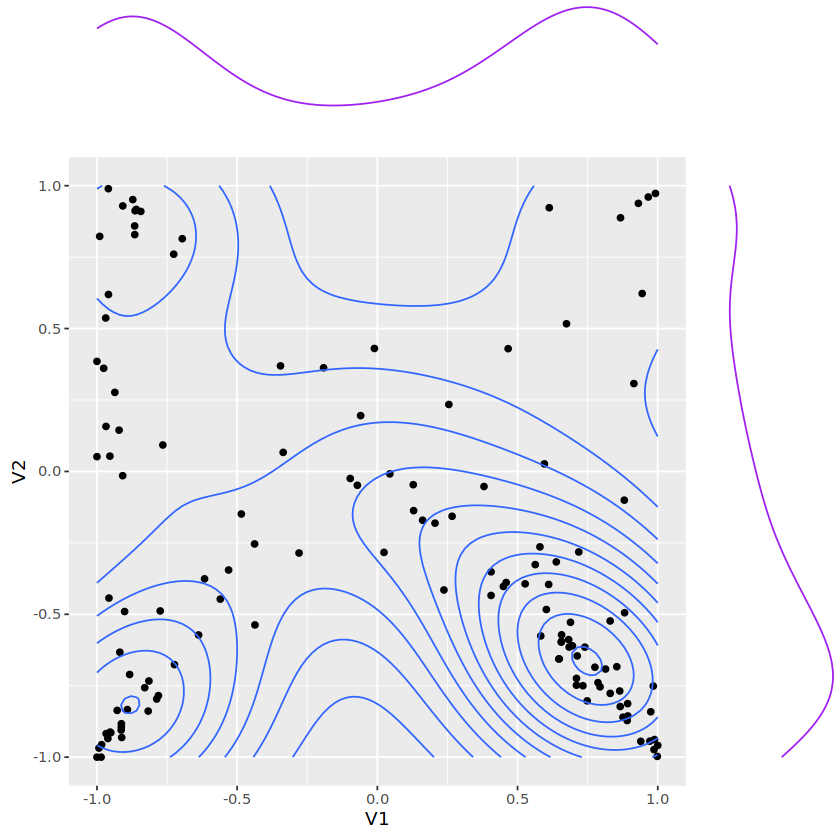

In [5]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% Brain_only_variants)

Dor <- subset(filtered_brain_only, AntPost %in% c('Ant') & Cell_Type=='Bulk' & Organ=='CTX'& Note=='SMALL')
Ven <- subset(filtered_brain_only, AntPost %in% c('Post')& Cell_Type=='Bulk' & Organ=='CTX'& Note=='SMALL')
Ant <- subset(filtered_brain_only, Hemisphere %in% c('L')& Cell_Type=='Bulk' & Organ=='CTX'& Note=='SMALL')
Post <- subset(filtered_brain_only, Hemisphere %in% c('R')& Cell_Type=='Bulk' & Organ=='CTX'& Note=='SMALL')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(Brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==Brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==Brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(Brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==Brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==Brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1,1)+ylim(-1,1)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [6]:
# 'CTX''CB''Heart''Kidney''BG''AMG''HIP''THAL''SUB''Liver''CLO''JGG'
brain_mosaic_filtered <- subset(mosaic_filtered, Organ %in% c('CTX') & !(Organ %in% c('Heart','Kidney','Liver','AMG','POA','SUB','CB','THAL','HIP','CLO','BG')) 
                                & !(Hemisphere %in% c('R')) & Region=='F' & !(Region %in% c('P','T','PF','O','Ins'))
                               )
length(unique(brain_mosaic_filtered$CHROM.POS.REF.ALT))
brain_mosaic_filtered_cutoff<- subset(brain_mosaic_filtered, LOWER_CI>0.001677998 & UPPER_CI<0.3923302)
unique(brain_mosaic_filtered_cutoff$Organ)
nrow(brain_mosaic_filtered_cutoff)
brain_only_variants<-unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT)
length(unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

ERROR: Error in subset(mosaic_filtered, Organ %in% c("CTX") & !(Organ %in% c("Heart", : object 'mosaic_filtered' not found


In [4]:
brain_only_variants<-variant_anno[variant_anno$Brain_only==1,]$variant_list

[1] 0.0008439443

[1] 0.000669184

[1] 0.0005065303

[1] 0.0009819004

Warning message:
“Removed 26 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 26 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_point()`).”


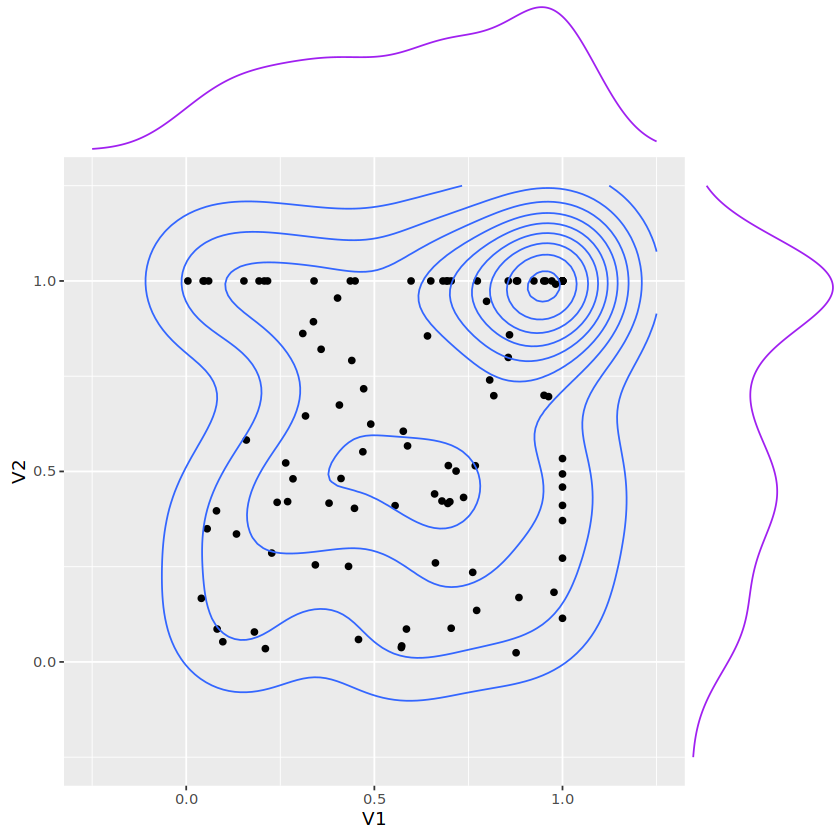

In [5]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Punch %in% c('36') & Cell_Type=='TBR1' & Organ=='CTX')
Post <- subset(filtered_brain_only, Punch %in% c('34')& Cell_Type=='TBR1' & Organ=='CTX')
Dor <- subset(filtered_brain_only, Punch %in% c('37')& Cell_Type=='TBR1' & Organ=='CTX')
Ven <- subset(filtered_brain_only, Punch %in% c('35')& Cell_Type=='TBR1' & Organ=='CTX')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)



In [6]:
nrow(delta[delta$V1>0.9 & delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 38

[1] 132

[1] 0.0008773242

[1] 0.0004798549

[1] 0.0008670244

[1] 0.0007203515

Warning message:
“Removed 25 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 25 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 25 rows containing missing values (`geom_point()`).”


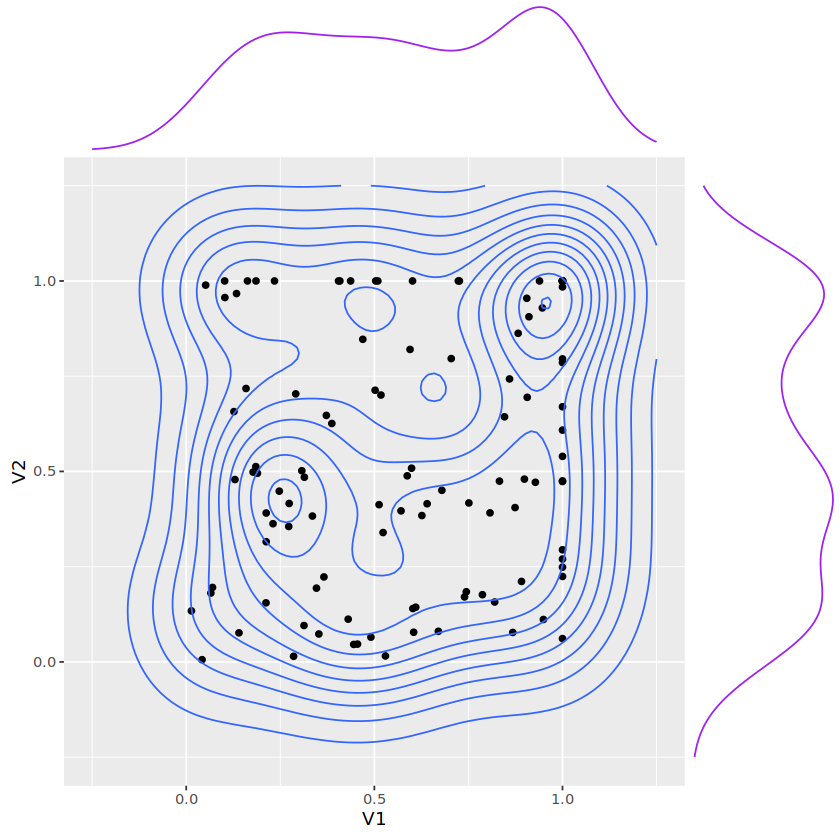

In [7]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Punch %in% c('36') & Cell_Type=='DLX1' & Organ=='CTX')
Post <- subset(filtered_brain_only, Punch %in% c('34')& Cell_Type=='DLX1' & Organ=='CTX')
Dor <- subset(filtered_brain_only, Punch %in% c('37')& Cell_Type=='DLX1' & Organ=='CTX')
Ven <- subset(filtered_brain_only, Punch %in% c('35')& Cell_Type=='DLX1' & Organ=='CTX')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [8]:
nrow(delta[delta$V1>0.9 & delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 31

[1] 132

In [129]:
binom.test(9,59,p=18/59, alternative='two.sided',# 4978 successes, 25000 trials, with 0.2 hypothesized probability of success
                      conf.level = 0.95)


	Exact binomial test

data:  9 and 59
number of successes = 9, number of trials = 59, p-value = 0.01036
alternative hypothesis: true probability of success is not equal to 0.3050847
95 percent confidence interval:
 0.07220243 0.26991959
sample estimates:
probability of success 
             0.1525424 


In [12]:
brain_only_variants<-variant_anno[variant_anno$Brain_only==1,]$variant_list

In [13]:
length(brain_only_variants)

[1] 132

[1] 0.001203961

[1] 0.0009381469

[1] 0.001625653

[1] 0.001554913

Warning message:
“Removed 64 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 64 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 64 rows containing missing values (`geom_point()`).”


[1] 88

[1] 50

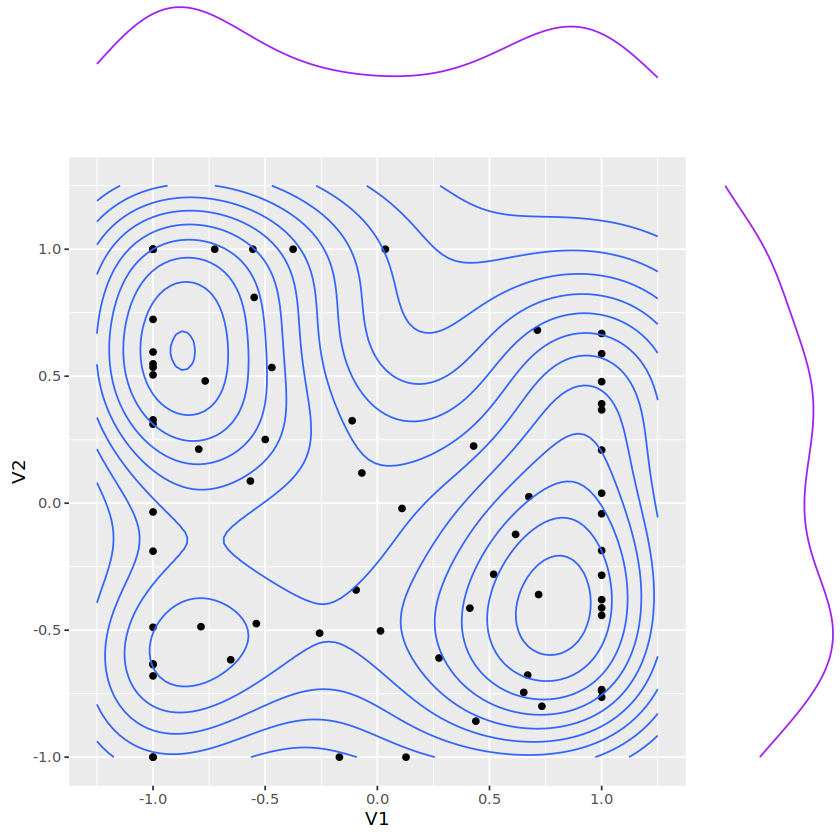

In [14]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Punch %in% c('72') & Cell_Type=='TBR1' & Organ=='CTX')
Post <- subset(filtered_brain_only, Punch %in% c('74')& Cell_Type=='TBR1' & Organ=='CTX')
Dor <- subset(filtered_brain_only, Punch %in% c('75')& Cell_Type=='TBR1' & Organ=='CTX')
Ven <- subset(filtered_brain_only, Punch %in% c('73')& Cell_Type=='TBR1' & Organ=='CTX')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

In [15]:
nrow(delta[delta$V1>0.9 & delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 22

[1] 50

[1] 0.001335014

[1] 0.001102964

[1] 0.001304862

[1] 0.002020498

Warning message:
“Removed 15 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 15 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


[1] 34

[1] 33

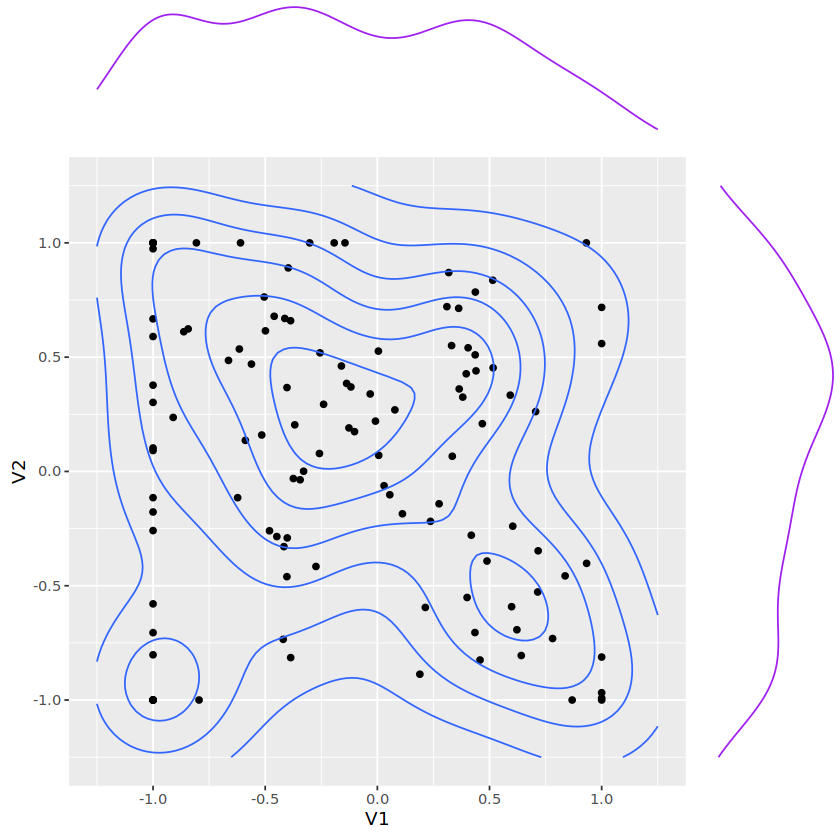

In [16]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Punch %in% c('72') & Cell_Type=='DLX1' & Organ=='CTX')
Post <- subset(filtered_brain_only, Punch %in% c('74')& Cell_Type=='DLX1' & Organ=='CTX')
Dor <- subset(filtered_brain_only, Punch %in% c('75')& Cell_Type=='DLX1' & Organ=='CTX')
Ven <- subset(filtered_brain_only, Punch %in% c('73')& Cell_Type=='DLX1' & Organ=='CTX')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

In [17]:
nrow(delta[delta$V1>0.9 & delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 8

[1] 33

In [137]:
binom.test(8,46,p=16/46, alternative='two.sided',# 4978 successes, 25000 trials, with 0.2 hypothesized probability of success
                      conf.level = 0.95)


	Exact binomial test

data:  8 and 46
number of successes = 8, number of trials = 46, p-value = 0.01275
alternative hypothesis: true probability of success is not equal to 0.3478261
95 percent confidence interval:
 0.07820342 0.31419065
sample estimates:
probability of success 
              0.173913 


# COUPTF2 vs TBR1 vs DLX1

In [42]:
brain_only_variants<-variant_anno[variant_anno$DLX_BR==1,]$variant_list

[1] 0.002779994

[1] 0.002493845

[1] 0.002779994

[1] 0.00162759

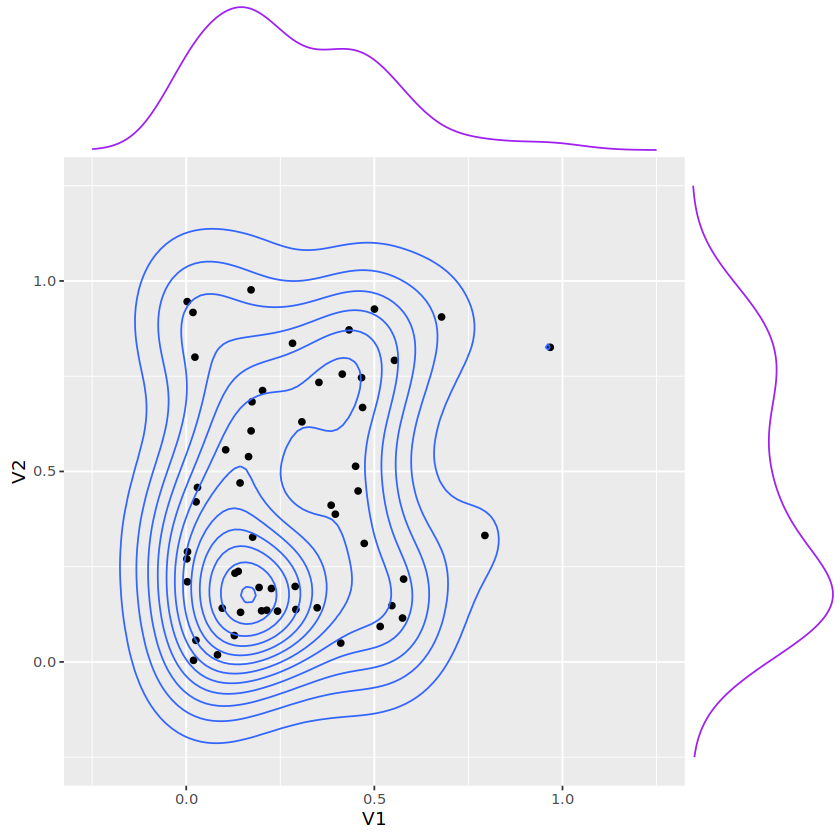

In [43]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('R'))
Post <- subset(filtered_brain_only,  Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere %in% c('R'))
Dor <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('R'))
Ven <- subset(filtered_brain_only,  Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere %in% c('R'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

[1] 0.001647681

[1] 0.001609381

[1] 0.001647681

[1] 0.001032232

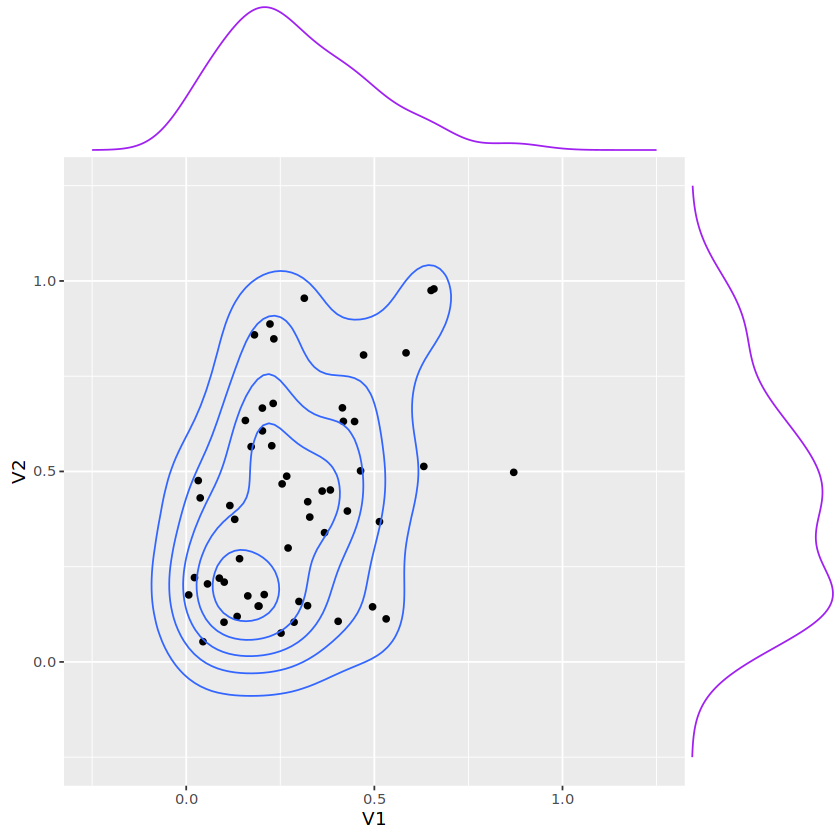

In [44]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('L'))
Post <- subset(filtered_brain_only,  Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere %in% c('L'))
Dor <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('L'))
Ven <- subset(filtered_brain_only,  Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere %in% c('L'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [ ]:
pdf(file="7614_leftonly_COUPTF2_vs_TBR1_vs_DLX1_scatterplot.pdf",height=10,width=10)
p
dev.off()

In [33]:
brain_only_variants<-variant_anno[variant_anno$Brain_only==1,]$variant_list

[1] 0.000935778

[1] 0.000984303

[1] 0.000935778

[1] 0.0007263307

Warning message:
“Removed 1 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


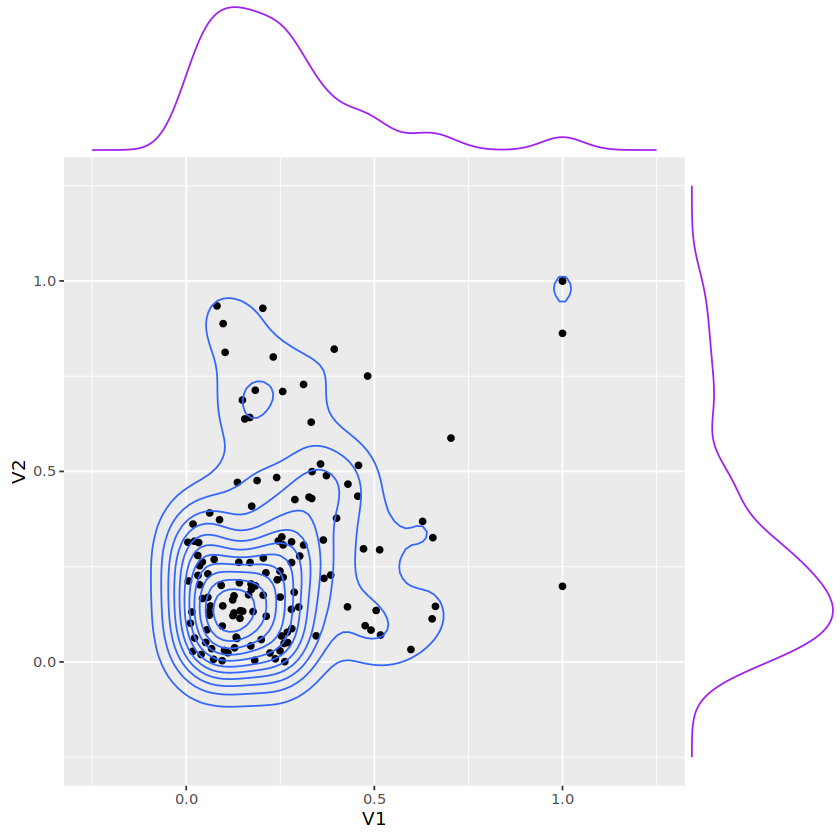

In [36]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX'  )
Post <- subset(filtered_brain_only,  Cell_Type=='TBR1' & Organ=='CTX' )
Dor <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' )
Ven <- subset(filtered_brain_only,  Cell_Type=='COUPTF2' & Organ=='CTX' )

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)